# <font color='blue'>Telecom Churn Case Study</font>
<br>
<font color='green'>
* Submitted by: <br> 
    1. Rahana Abdul Kadir <br> 
    2. Deepak Shukla <br> 
    3. Rizwan Khan <br> 
    4. Ramakant Sharma <br> 
    </font>

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
 

#### Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

Filename: telecom_churn_data.csv

#### DATA UNDERSTANDING & PREPARATION

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
#Load CSV File
telecomDF = pd.read_csv('telecom_churn_data.csv', low_memory=False)
telecomDF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#Looks at rows and columns 
print('Dataframe Shape: ', telecomDF.shape)

Dataframe Shape:  (99999, 226)


In [6]:
#Look at Information
print("Dataframe Info: \n")
telecomDF.info()

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Looks at some statistical information about dataframe.
print("Dataframe Description: \n")
telecomDF.describe

Dataframe Description: 



<bound method NDFrame.describe of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
5         7000286308        109             0.0             0.0   
6         7001051193        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
9         7001864400        109             0.0             0.0   
10        7000471350        109             0.0             0.0   
11        7002006969        109             0.0             0.0   
12        7001419799        109             0.0             0.0   
13        7002191713        

In [8]:
#Look at the numeric columns and categorical columns are:
numerical_vars = telecomDF.dtypes[telecomDF.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_vars))

categorical_vars = telecomDF.dtypes[telecomDF.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_vars))

# of Numerical features:  214
# of Categorical features:  12


In [9]:
#RENAME COLUMNS

The last four columns started with month names - jun. jul, aug, sep. Since the nomenclature for other columns are given month numbers instead of names lets rename these columns according to their month number

In [10]:

telecomDF.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [11]:
#Function to find MissingValues based on cutoff percentage

def MissingValues(Cutoff):
    # Function to retun the columns with more than Cutoff% missing values.
    missing = round(100*(telecomDF.isnull().sum()/len(telecomDF.index)), 2)
    print("Number of Missing Values for cutoff > {} % : {}".format(Cutoff,len(missing.loc[missing > Cutoff])))
      
    return missing.loc[missing > Cutoff]

In [12]:
# summing up the missing values (column-wise)
telecomDF.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [13]:
# Percentage of missing values (column-wise)
round(100*(telecomDF.isnull().sum()/len(telecomDF.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [14]:
#Check for missing values where cutoff >70%

MissingValues(70)

Number of Missing Values for cutoff > 70 % : 40


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [15]:
#The some columns with missing values are important for getting the high-value customers 
#They are :av_rech_amt_data(_6,_7,_8,_9), arpu_2g(_6,_7,_8,_9) ,arpu_3g(_6,_7,_8,_9) ,count_rech_2g(_6,_7,_8,_9) , count_rech_3g(_6,_7,_8,_9)  ,
#max_rech_data(_6,_7,_8,_9) ,total_rech_data(_6,_7,_8,_9) ,fb_user(_6,_7,_8,_9) , night_pck_user(_6,_7,_8,_9)
# -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with mode.
#telecomDF.av_rech_amt_data_6.mode()[0]
telecomDF.av_rech_amt_data_6.fillna(value=telecomDF.av_rech_amt_data_6.mode()[0], inplace=True)
telecomDF.av_rech_amt_data_7.fillna(value=telecomDF.av_rech_amt_data_7.mode()[0], inplace=True)
telecomDF.av_rech_amt_data_8.fillna(value=telecomDF.av_rech_amt_data_8.mode()[0], inplace=True)
telecomDF.av_rech_amt_data_9.fillna(value=telecomDF.av_rech_amt_data_9.mode()[0], inplace=True)

telecomDF.arpu_2g_6.fillna(value=telecomDF.arpu_2g_6.mode()[0], inplace=True)
telecomDF.arpu_2g_7.fillna(value=telecomDF.arpu_2g_7.mode()[0], inplace=True)
telecomDF.arpu_2g_8.fillna(value=telecomDF.arpu_2g_8.mode()[0], inplace=True)
telecomDF.arpu_2g_9.fillna(value=telecomDF.arpu_2g_9.mode()[0], inplace=True)

telecomDF.arpu_3g_6.fillna(value=telecomDF.arpu_3g_6.mode()[0], inplace=True)
telecomDF.arpu_3g_7.fillna(value=telecomDF.arpu_3g_7.mode()[0], inplace=True)
telecomDF.arpu_3g_8.fillna(value=telecomDF.arpu_3g_8.mode()[0], inplace=True)
telecomDF.arpu_3g_9.fillna(value=telecomDF.arpu_3g_9.mode()[0], inplace=True)

telecomDF.count_rech_2g_6.fillna(value=telecomDF.count_rech_2g_6.mode()[0], inplace=True)
telecomDF.count_rech_2g_7.fillna(value=telecomDF.count_rech_2g_7.mode()[0], inplace=True)
telecomDF.count_rech_2g_8.fillna(value=telecomDF.count_rech_2g_8.mode()[0], inplace=True)
telecomDF.count_rech_2g_9.fillna(value=telecomDF.count_rech_2g_9.mode()[0], inplace=True)

telecomDF.count_rech_3g_6.fillna(value=telecomDF.count_rech_3g_6.mode()[0], inplace=True)
telecomDF.count_rech_3g_7.fillna(value=telecomDF.count_rech_3g_7.mode()[0], inplace=True)
telecomDF.count_rech_3g_8.fillna(value=telecomDF.count_rech_3g_8.mode()[0], inplace=True)
telecomDF.count_rech_3g_9.fillna(value=telecomDF.count_rech_3g_9.mode()[0], inplace=True)

telecomDF.max_rech_data_6.fillna(value=telecomDF.max_rech_data_6.mode()[0], inplace=True)
telecomDF.max_rech_data_7.fillna(value=telecomDF.max_rech_data_7.mode()[0], inplace=True)
telecomDF.max_rech_data_8.fillna(value=telecomDF.max_rech_data_8.mode()[0], inplace=True)
telecomDF.max_rech_data_9.fillna(value=telecomDF.max_rech_data_9.mode()[0], inplace=True)

telecomDF.total_rech_data_6.fillna(value=telecomDF.total_rech_data_6.mode()[0], inplace=True)
telecomDF.total_rech_data_7.fillna(value=telecomDF.total_rech_data_7.mode()[0], inplace=True)
telecomDF.total_rech_data_8.fillna(value=telecomDF.total_rech_data_8.mode()[0], inplace=True)
telecomDF.total_rech_data_9.fillna(value=telecomDF.total_rech_data_9.mode()[0], inplace=True)

telecomDF.fb_user_6.fillna(value=telecomDF.fb_user_6.mode()[0], inplace=True)
telecomDF.fb_user_7.fillna(value=telecomDF.fb_user_7.mode()[0], inplace=True)
telecomDF.fb_user_8.fillna(value=telecomDF.fb_user_8.mode()[0], inplace=True)
telecomDF.fb_user_9.fillna(value=telecomDF.fb_user_9.mode()[0], inplace=True)

telecomDF.night_pck_user_6.fillna(value=telecomDF.night_pck_user_6.mode()[0], inplace=True)
telecomDF.night_pck_user_7.fillna(value=telecomDF.night_pck_user_7.mode()[0], inplace=True)
telecomDF.night_pck_user_8.fillna(value=telecomDF.night_pck_user_8.mode()[0], inplace=True)
telecomDF.night_pck_user_9.fillna(value=telecomDF.night_pck_user_9.mode()[0], inplace=True)


In [16]:
#Check again for missing values where cutoff >50%
missing50=MissingValues(50)
missing50

Number of Missing Values for cutoff > 50 % : 4


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64

In [17]:
# Drop these columns 
drop_columns = missing50.loc[missing50 > 50].index

telecomDF.drop(drop_columns, axis=1, inplace=True)

In [18]:
#Check for missing values where cutoff >5%

missing5=MissingValues(5)

missing5

Number of Missing Values for cutoff > 5 % : 58


onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


In [19]:
#Check for missing values where cutoff >7%

missing7 = list(MissingValues(7).index)

telecomDF[telecomDF[missing7].isnull().all(axis=1)][missing7].head()

Number of Missing Values for cutoff > 7 % : 29


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#impute these values with mode
for col1 in missing7:
    telecomDF[col1].fillna(telecomDF[col1].mode()[0], inplace=True)

In [21]:
telecomDF=telecomDF[~telecomDF[missing7].isnull().all(axis=1)]
telecomDF.shape

(99999, 222)

In [22]:
#Check for missing values where cutoff >2%
missing2 = list(MissingValues(2).index)
missing2

Number of Missing Values for cutoff > 2 % : 89


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou

In [23]:
# Row wise missing values cut off >2%

telecomDF[telecomDF[missing2].isnull().all(axis=1)][missing2].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Remove rows
telecomDF=telecomDF[~telecomDF[missing2].isnull().all(axis=1)]
telecomDF.shape

(99618, 222)

In [25]:
telecomDF.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_col = list(telecomDF.filter(regex='date').columns)
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [26]:
# convert to datetime
#for col in date_col:
#    telecomDF[col] = pd.to_datetime(telecomDF[col], format='%m/%d/%Y')

#print(telecomDF[date_col].info())
#telecomDF[date_col].head()

# Converting dtype of date columns to datetime
#for col in date_columns:
#    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [27]:
#telecomDF.select_dtypes(include=['datetime64']).columns

In [28]:
#Fill the date column values
telecomDF.date_of_last_rech_6.fillna(value='6/30/2014', inplace=True)
telecomDF.date_of_last_rech_7.fillna(value='7/31/2014', inplace=True)
telecomDF.date_of_last_rech_8.fillna(value='8/31/2014', inplace=True)
telecomDF.date_of_last_rech_9.fillna(value='9/30/2014', inplace=True)

telecomDF.last_date_of_month_6.fillna(value='6/30/2014', inplace=True)
telecomDF.last_date_of_month_7.fillna(value='7/31/2014', inplace=True)
telecomDF.last_date_of_month_8.fillna(value='8/31/2014', inplace=True)
telecomDF.last_date_of_month_9.fillna(value='9/30/2014', inplace=True)

In [29]:
#Check for missing values where cutoff >0%
missing0 = list(MissingValues(0).index)
missing0

Number of Missing Values for cutoff > 0 % : 90


['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_

In [30]:
for col in missing0:
    telecomDF[col].fillna(telecomDF[col].mode()[0], inplace=True)

In [31]:
MissingValues(0)

Number of Missing Values for cutoff > 0 % : 0


Series([], dtype: float64)

In [32]:
#Column having only zero as values

zero_val=telecomDF.columns[(telecomDF == 0).all()]
print ("No of features which has only zero as values :",len(zero_val))
print ("They are:",zero_val)   

No of features which has only zero as values : 11
They are: Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [33]:
# Remove those columns. 
telecomDF.drop(zero_val,axis=1,inplace=True)

In [34]:
# Percentage of data left after removing the missing values.
print("Percentage :",round(telecomDF.shape[0]/99999 *100,2))
print ("Number of customers: ",telecomDF.shape[0])
print ("Number of features: ",telecomDF.shape[1])

Percentage : 99.62
Number of customers:  99618
Number of features:  211


#### Converting object datatype to datetime

In [36]:
# convert to datetime
for col in date_col:
    telecomDF[col] = pd.to_datetime(telecomDF[col],format='%m/%d/%Y')

print(telecomDF[date_col].info())
telecomDF[date_col].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Data columns (total 8 columns):
last_date_of_month_6    99618 non-null datetime64[ns]
last_date_of_month_7    99618 non-null datetime64[ns]
last_date_of_month_8    99618 non-null datetime64[ns]
last_date_of_month_9    99618 non-null datetime64[ns]
date_of_last_rech_6     99618 non-null datetime64[ns]
date_of_last_rech_7     99618 non-null datetime64[ns]
date_of_last_rech_8     99618 non-null datetime64[ns]
date_of_last_rech_9     99618 non-null datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 6.1 MB
None


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28


In [37]:
telecomDF.select_dtypes(include=['datetime64']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [38]:
# DERIVED COLUMNS 

In [39]:
# New DERIVED Columns for Total Data Recharge Amount

telecomDF["total_rech_data_amt_6"] = telecomDF["total_rech_data_6"]*telecomDF['av_rech_amt_data_6']
telecomDF["total_rech_data_amt_7"] = telecomDF["total_rech_data_7"]*telecomDF['av_rech_amt_data_7']
telecomDF["total_rech_data_amt_8"] = telecomDF["total_rech_data_8"]*telecomDF['av_rech_amt_data_8']
telecomDF["total_rech_data_amt_9"] = telecomDF["total_rech_data_9"]*telecomDF['av_rech_amt_data_9']



In [40]:
#Creating new feature: total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,total_rech_count_data_9

telecomDF["total_rech_count_data_6"] = telecomDF["count_rech_2g_6"]*telecomDF['count_rech_3g_6']
telecomDF["total_rech_count_data_7"] = telecomDF["count_rech_2g_7"]*telecomDF['count_rech_3g_7']
telecomDF["total_rech_count_data_8"] = telecomDF["count_rech_2g_8"]*telecomDF['count_rech_3g_8']
telecomDF["total_rech_count_data_9"] = telecomDF["count_rech_2g_9"]*telecomDF['count_rech_3g_9']   

In [41]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

telecomDF["avg_rech_amt_6"] = telecomDF["total_rech_amt_6"]*telecomDF['total_rech_num_6']
telecomDF["avg_rech_amt_7"] = telecomDF["total_rech_amt_7"]*telecomDF['total_rech_num_7']
telecomDF["avg_rech_amt_8"] = telecomDF["total_rech_amt_8"]*telecomDF['total_rech_num_8']
telecomDF["avg_rech_amt_9"] = telecomDF["total_rech_amt_9"]*telecomDF['total_rech_num_9']   

In [42]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9

telecomDF["total_rech_6"] = telecomDF["total_rech_amt_6"]*telecomDF['total_rech_data_amt_6']
telecomDF["total_rech_7"] = telecomDF["total_rech_amt_7"]*telecomDF['total_rech_data_amt_7']
telecomDF["total_rech_8"] = telecomDF["total_rech_amt_8"]*telecomDF['total_rech_data_amt_8']
telecomDF["total_rech_9"] = telecomDF["total_rech_amt_9"]*telecomDF['total_rech_data_amt_9']   

## Filter High Value customers

In [43]:

#Average of first two months of total monthly recharge amount

avg_goodRech =(telecomDF.total_rech_6 + telecomDF.total_rech_7)/2

# finding the cutoff of the 70th percentile of the good phase average recharge amounts
amt_cutoff= np.percentile(avg_goodRech,70.0)
print('70 percentile of first two months avg recharge amount: ', amt_cutoff)

# Filtering the users .
gud_cust = telecomDF[avg_goodRech >=  amt_cutoff]
gud_cust.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: ", len(gud_cust))
print("Percentage High-value users in data : ",round(len(gud_cust)/telecomDF.shape[0]*100),2)
print("Dataframe Shape: ",gud_cust.shape)


70 percentile of first two months avg recharge amount:  66220.0
Number of High-Value Customers in the Dataset:  29901
Percentage High-value users in data :  30 2
Dataframe Shape:  (29901, 227)


In [44]:
gud_cust.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,total_rech_count_data_8,total_rech_count_data_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_6,total_rech_7,total_rech_8,total_rech_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,...,0.0,0.0,1448,756,504,0,91224.0,63504.0,63504.0,0.0
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,1349.850,3171.480,500.000,...,0.0,0.0,7900,3950,25466,0,243320.0,121660.0,560252.0,0.0
2,7001524846,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.721,492.223,137.362,166.787,...,0.0,0.0,8303,12621,1680,2790,67298.0,212754.0,24840.0,46872.0
3,7000875565,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,430.975,299.869,187.894,206.490,...,0.0,0.0,5700,2088,320,220,87780.0,53592.0,24640.0,55440.0
4,7002124215,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,514.453,597.753,637.760,578.596,...,0.0,0.0,13200,17680,19386,11560,92400.0,104720.0,110572.0,171360.0


In [45]:
#gud_cust.shape

In [46]:
gud_cust.select_dtypes(include=['datetime64']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

### Tag churners and remove attributes of the churn phase

In [47]:
total_churners=gud_cust["total_ic_mou_9"] + gud_cust["total_og_mou_9"] + gud_cust["vol_2g_mb_9"] + gud_cust["vol_3g_mb_9"]
total_churners

0           0.00
1           0.00
2         177.09
3         590.30
4        1284.14
5         583.78
6        5734.89
7         822.13
8         254.97
9        3213.82
10       1184.49
11       1325.93
12       5701.29
13        477.40
14        708.57
15          0.00
16        674.89
17       1879.62
18        120.62
19          0.00
20       1394.60
21        508.43
22       1544.04
23       1247.37
24       1015.95
25        455.09
26       2877.10
27       1646.89
28          0.00
29       2539.90
          ...   
29871     667.98
29872     787.62
29873    4267.06
29874     485.75
29875      82.79
29876     229.94
29877     483.82
29878     190.95
29879     549.45
29880    1626.53
29881     682.34
29882    1384.28
29883    1746.68
29884     563.94
29885    2539.93
29886    1139.49
29887     631.48
29888    1872.75
29889     411.29
29890     632.92
29891     522.34
29892    3245.49
29893    3446.27
29894     215.21
29895     651.59
29896     457.12
29897     455.84
29898    1119.

In [48]:
gud_cust['churn'] = np.where(total_churners, 0, 1)
gud_cust.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,total_rech_count_data_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_6,total_rech_7,total_rech_8,total_rech_9,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,...,0.0,1448,756,504,0,91224.0,63504.0,63504.0,0.0,1
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,1349.850,3171.480,500.000,...,0.0,7900,3950,25466,0,243320.0,121660.0,560252.0,0.0,1
2,7001524846,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.721,492.223,137.362,166.787,...,0.0,8303,12621,1680,2790,67298.0,212754.0,24840.0,46872.0,0
3,7000875565,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,430.975,299.869,187.894,206.490,...,0.0,5700,2088,320,220,87780.0,53592.0,24640.0,55440.0,0
4,7002124215,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,514.453,597.753,637.760,578.596,...,0.0,13200,17680,19386,11560,92400.0,104720.0,110572.0,171360.0,0


In [49]:
# Columns to be dropped: all columns ending with "_9"
drop_column_9 = [col_9 for col_9 in list(gud_cust) if col_9.endswith("_9")]
drop_column_9 += ["vbc_3g_9"]
gud_cust.drop(drop_column_9, axis=1, inplace=True)


In [50]:
print("Number of columns droped here  : ", len(drop_column_9))
print("Dataframe Shape: ", gud_cust.shape)

Number of columns droped here  :  57
Dataframe Shape:  (29901, 172)


###  check data imbalance

In [51]:
#checking whether data is imbalanced or not
churn  = gud_cust["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     :",churn[1])
print("Total Not-Churn Count :",churn[0])
print("Churn Rate            :",churn_rate*100)


Total Churn Count     : 2514
Total Not-Churn Count : 27387
Churn Rate            : 8.407745560349152


Churn Rate is **8.4%**.Data is highly imbalanced.In this dataset Majority are Non churners and Churners are only 8.4%. we need to balance it before we can create the model

In [52]:
# OUTLIER TREATMENT

In [53]:
Telecom_Gud=gud_cust.copy()

In [54]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Telecom_Gud.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,churn
count,2.990100e+04,29901.0,29901.000000,29901.000000,29901.000000,29901.000000,29901.000000,29901.000000,29901.000000,29901.000000,...,29901.000000,29901.000000,29901.000000,2.990100e+04,29901.000000,29901.000000,2.990100e+04,2.990100e+04,2.990100e+04,29901.000000
mean,7.001208e+09,109.0,556.121682,559.570868,506.985012,259.558461,267.522138,233.957374,374.585077,379.403445,...,0.721615,0.874051,0.930103,9.491754e+03,9291.962844,7808.345005,4.173779e+05,4.741295e+05,4.317810e+05,0.084077
std,6.906002e+05,0.0,456.681092,477.613458,500.575026,451.047523,472.287656,450.387103,475.952019,492.306197,...,9.523414,10.620469,13.518881,1.902662e+04,16282.743333,17625.328773,5.223122e+06,2.950427e+06,4.513718e+06,0.277509
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.000612e+09,109.0,317.363000,318.375000,236.837000,19.110000,18.160000,11.860000,77.180000,75.130000,...,0.000000,0.000000,0.000000,2.510000e+03,2429.000000,1191.000000,7.392000e+04,7.592200e+04,4.065600e+04,0.000000
50%,7.001207e+09,109.0,475.870000,475.191000,425.380000,88.810000,87.560000,69.380000,231.040000,228.680000,...,0.000000,0.000000,0.000000,5.248000e+03,5070.000000,3710.000000,1.155000e+05,1.204280e+05,9.240000e+04,0.000000
75%,7.001804e+09,109.0,692.159000,691.859000,654.443000,293.730000,293.530000,244.890000,488.630000,493.630000,...,0.000000,0.000000,0.000000,1.065400e+04,10528.000000,8541.000000,2.182180e+05,2.442440e+05,1.902600e+05,0.000000
90%,7.002166e+09,109.0,983.947000,988.100000,969.886000,736.980000,771.180000,660.480000,880.630000,906.990000,...,1.000000,1.000000,0.000000,2.060000e+04,20176.000000,17780.000000,6.141800e+05,7.128000e+05,6.247150e+05,0.000000
95%,7.002288e+09,109.0,1234.315000,1255.957000,1252.216000,1109.090000,1155.130000,1055.280000,1237.480000,1253.740000,...,2.000000,2.000000,2.000000,3.072000e+04,30750.000000,27510.000000,1.202490e+06,1.443351e+06,1.318032e+06,1.000000
99%,7.002387e+09,109.0,1981.222000,1998.245000,1986.867000,2114.230000,2157.730000,2119.460000,2294.330000,2364.360000,...,12.000000,14.000000,15.000000,6.624800e+04,66388.000000,64480.000000,4.849920e+06,5.715360e+06,5.713092e+06,1.000000


### Exploratory Data Analysis

In [55]:
Telecom_Gud['churn'].value_counts()

0    27387
1     2514
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn/Non Churn Distribution')

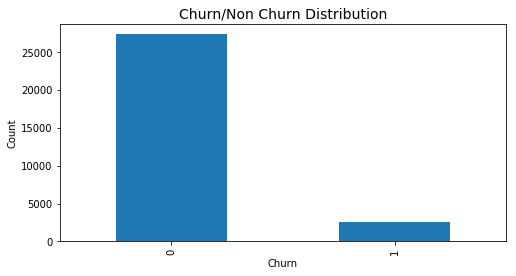

In [56]:
plt.figure(figsize=(8,4))
Telecom_Gud['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn')
plt.title('Churn/Non Churn Distribution',fontsize=14)

In [57]:
Telecom_Gud['aon'].describe()

count    29901.000000
mean      1217.052808
std        959.492066
min        180.000000
25%        464.000000
50%        858.000000
75%       1777.000000
max       4321.000000
Name: aon, dtype: float64

### arpu (Average Revenue per User)

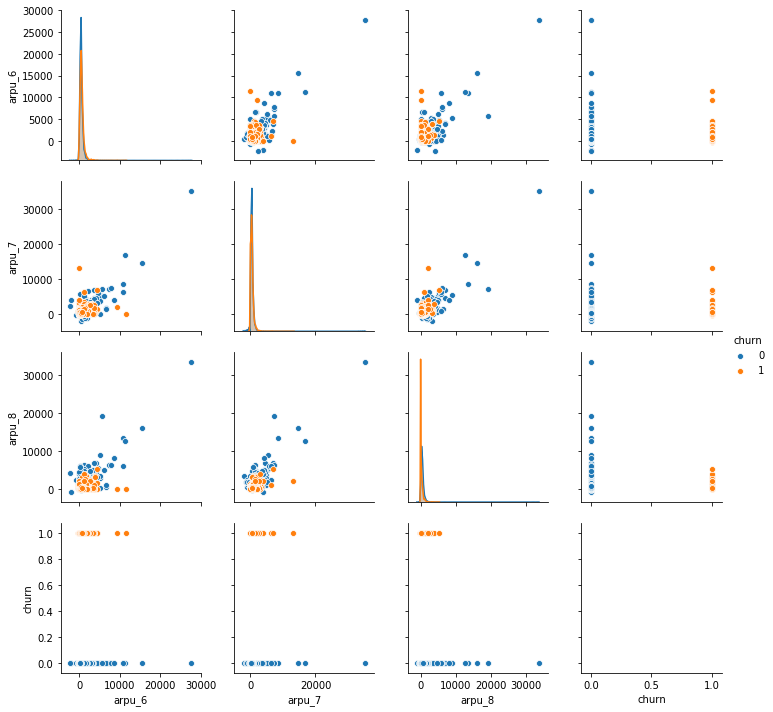

In [58]:
sns.pairplot(data=Telecom_Gud[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

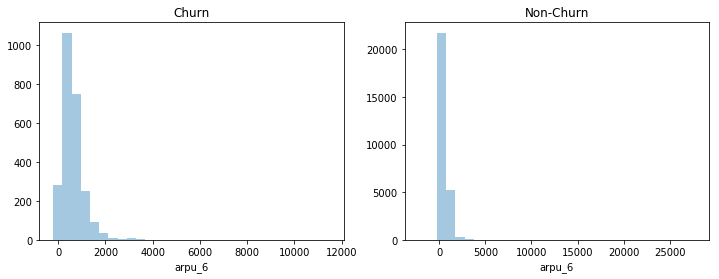

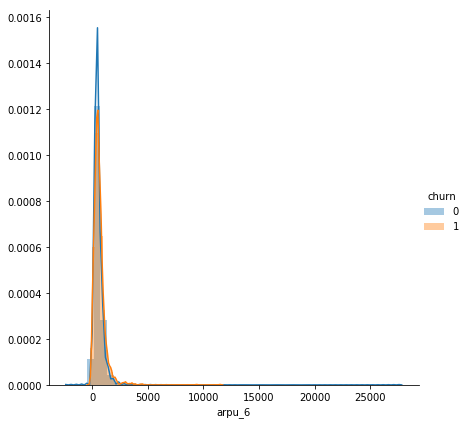

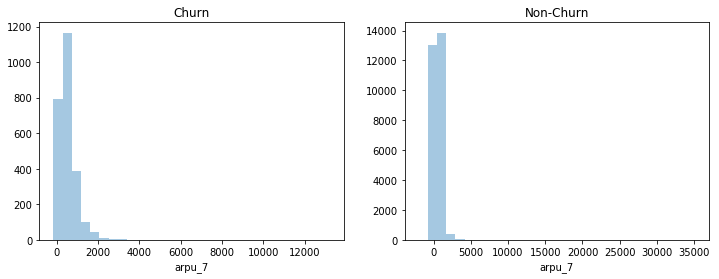

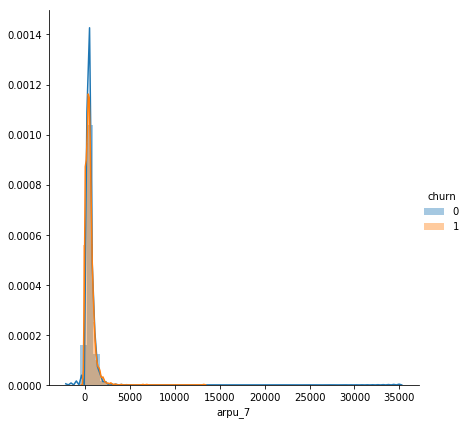

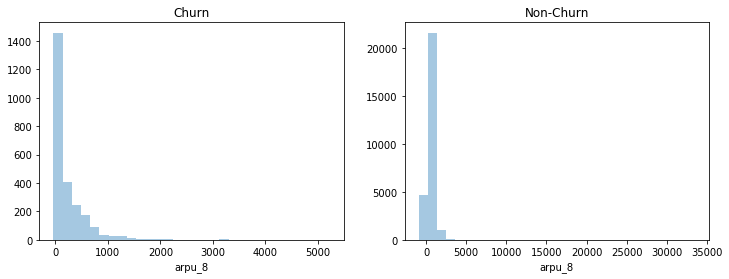

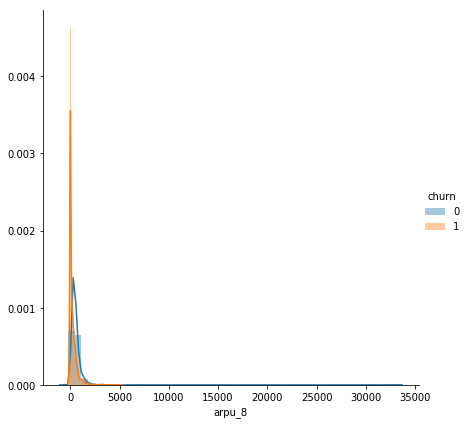

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"arpu_6").add_legend()

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].arpu_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].arpu_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"arpu_7").add_legend()

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].arpu_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].arpu_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"arpu_8").add_legend()




### onnet_mou 

In [60]:

#sns.pairplot(data=Telecom_Gud[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

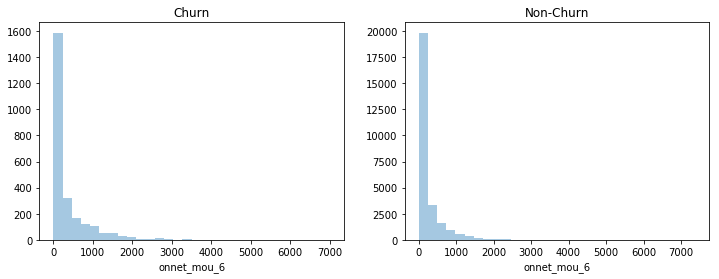

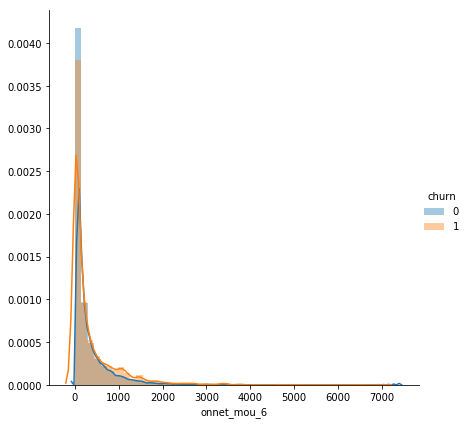

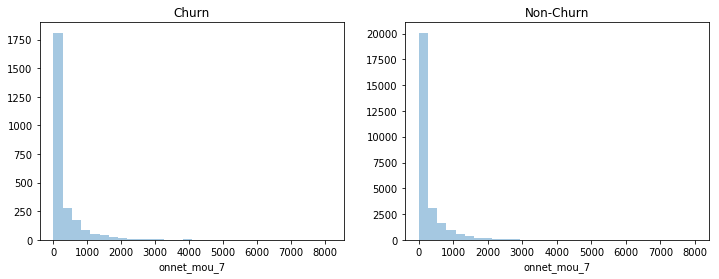

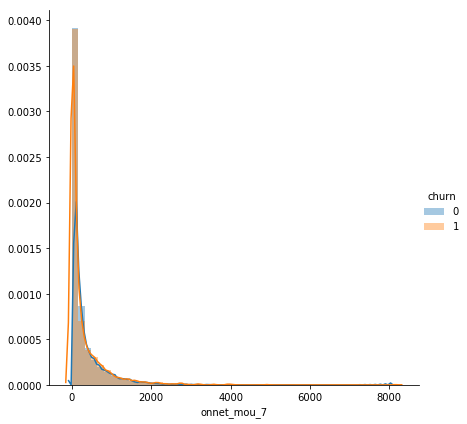

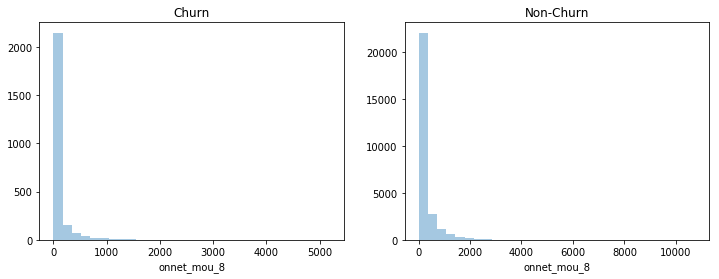

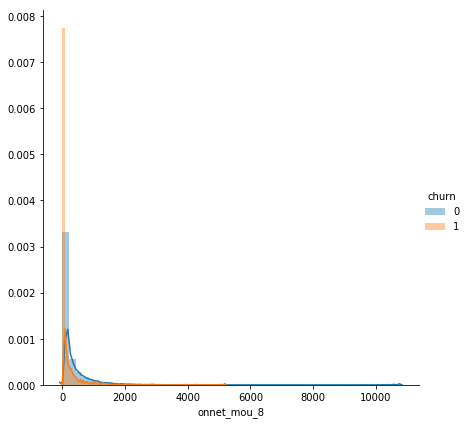

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"onnet_mou_6").add_legend()

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].onnet_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].onnet_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"onnet_mou_7").add_legend()

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].onnet_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].onnet_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"onnet_mou_8").add_legend()



## Offnet_mou (Calls outside of the operator network)

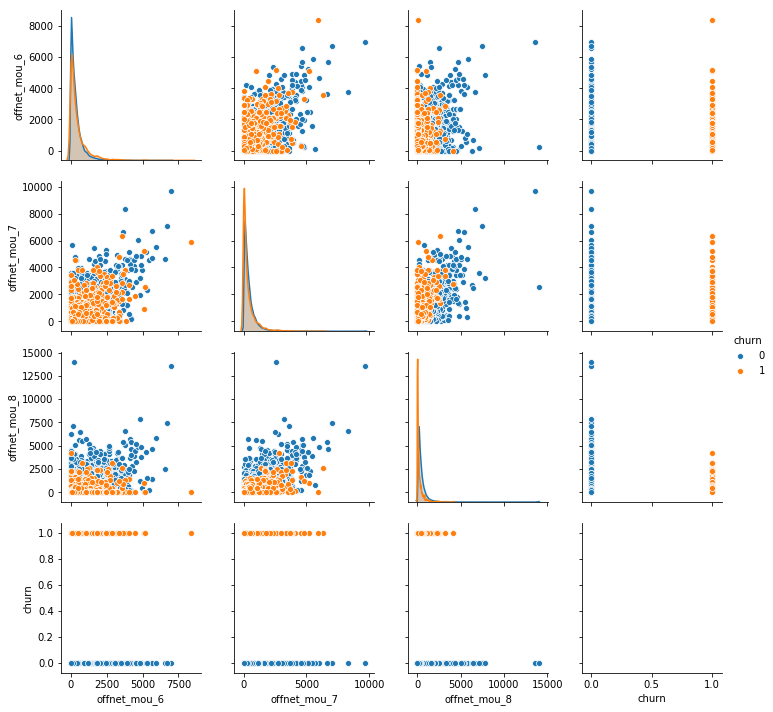

In [62]:
sns.pairplot(data=Telecom_Gud[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

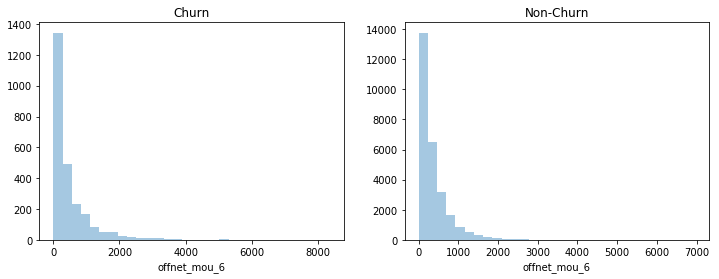

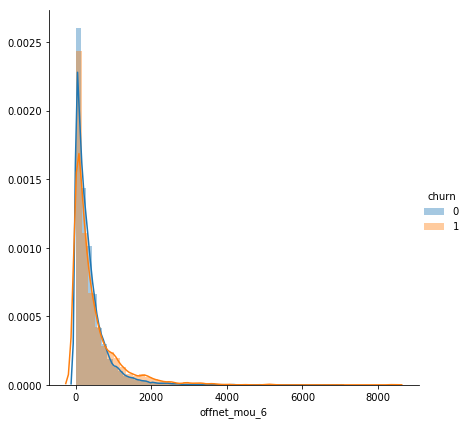

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"offnet_mou_6").add_legend()


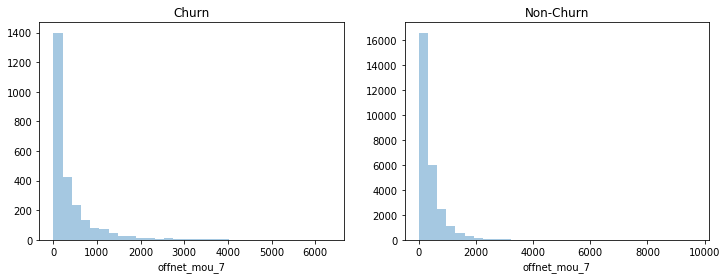

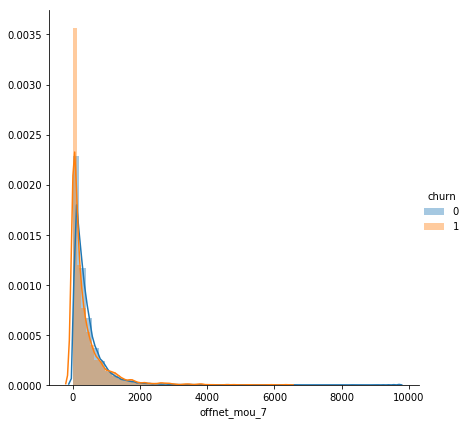

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].offnet_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].offnet_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"offnet_mou_7").add_legend()

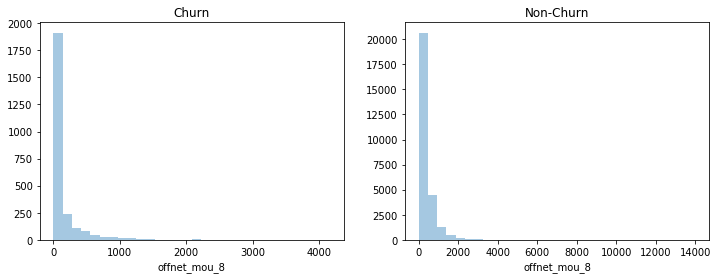

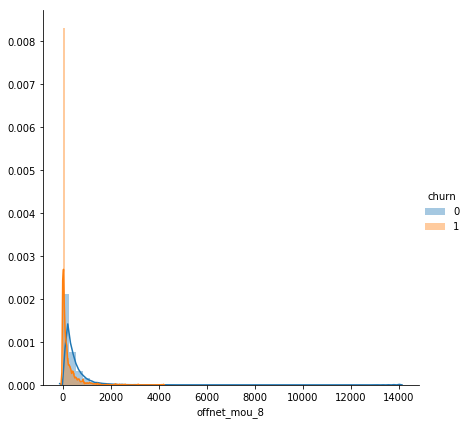

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].offnet_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].offnet_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"offnet_mou_8").add_legend()

## roam_ic_mou (Customer in roaming zone)

In [66]:
#sns.pairplot(data=Telecom_Gud[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

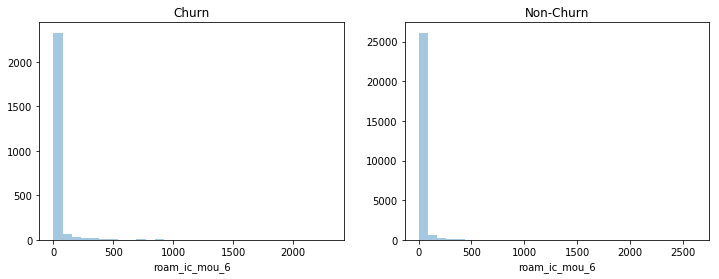

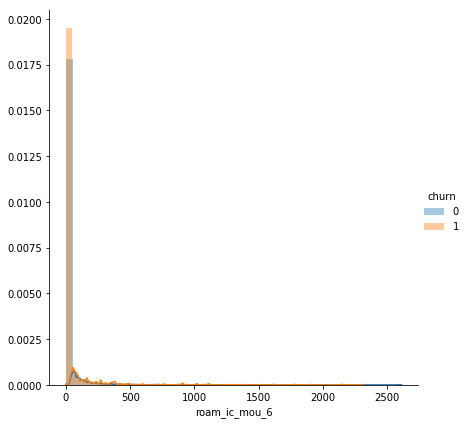

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"roam_ic_mou_6").add_legend()


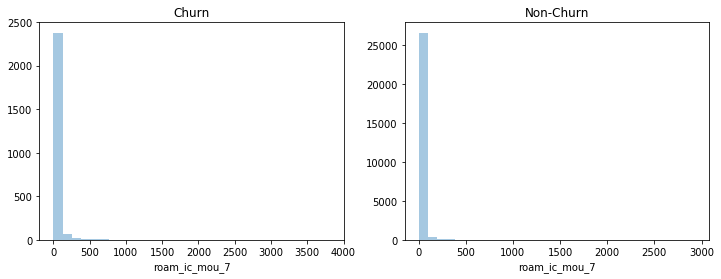

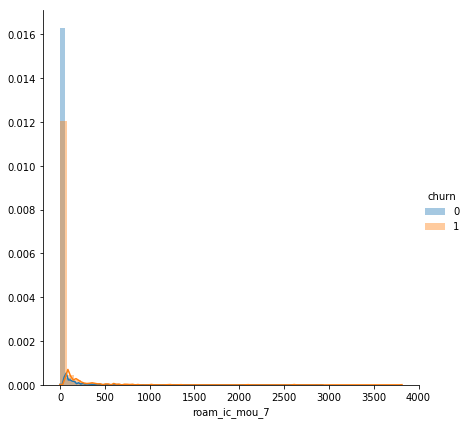

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].roam_ic_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].roam_ic_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"roam_ic_mou_7").add_legend()


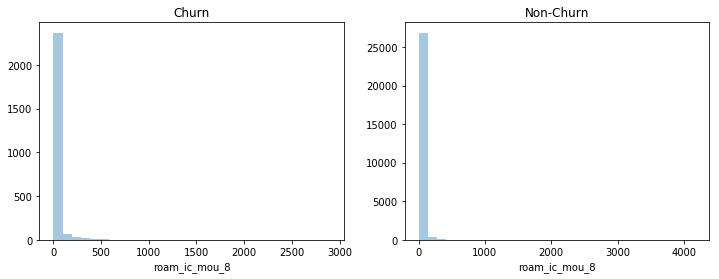

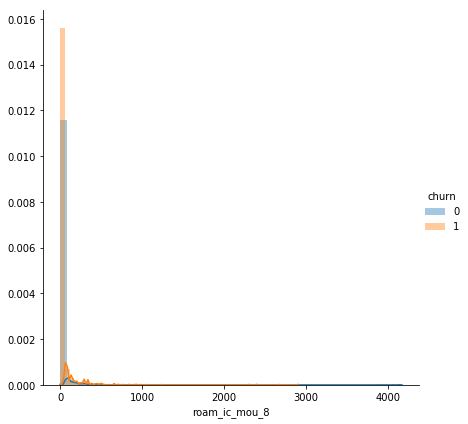

In [69]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].roam_ic_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].roam_ic_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"roam_ic_mou_8").add_legend()

## loc_og_mou (within the circle outgoing calls)

In [70]:
#sns.pairplot(data=Telecom_Gud[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

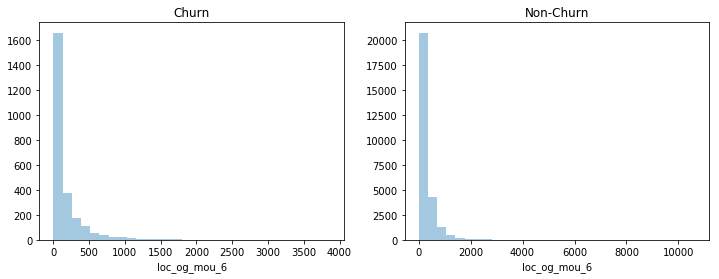

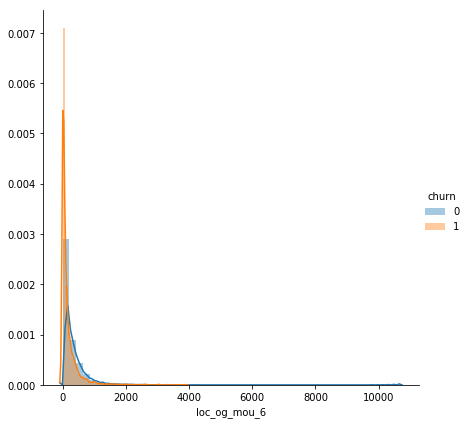

In [71]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_og_mou_6").add_legend()

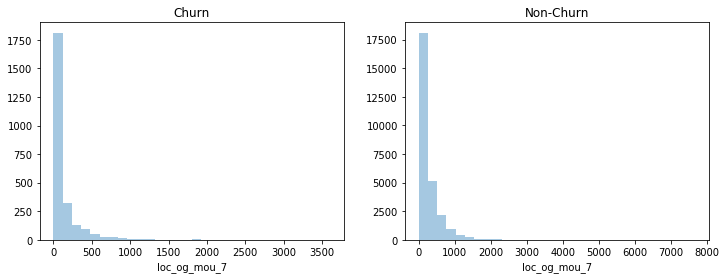

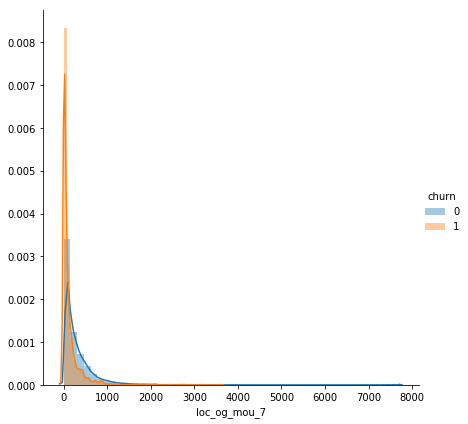

In [72]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_og_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_og_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_og_mou_7").add_legend()

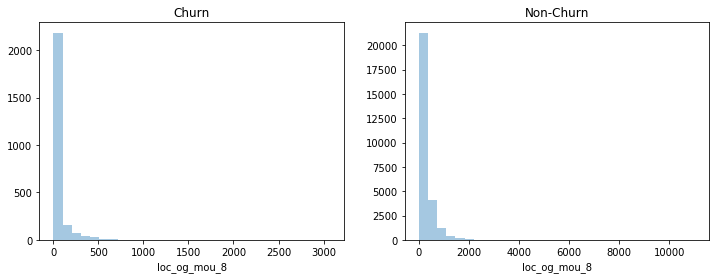

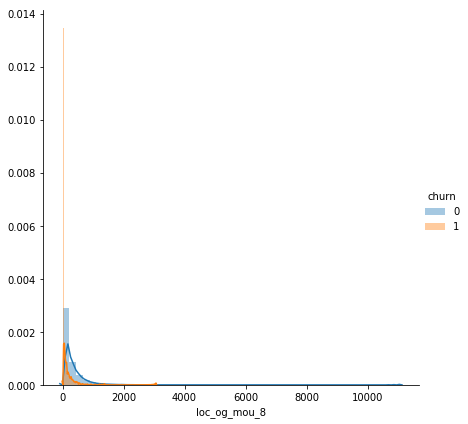

In [73]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_og_mou_8").add_legend()

## std_og_mou (Outside calling circle/zone calls)

In [74]:
#sns.pairplot(data=Telecom_Gud[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

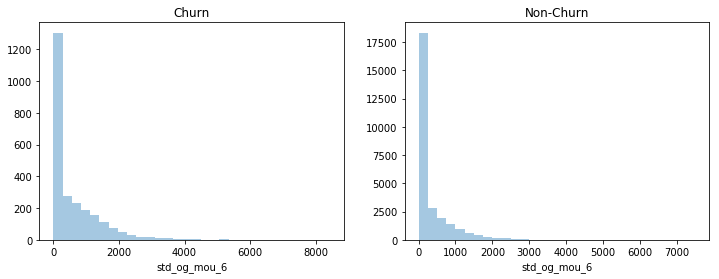

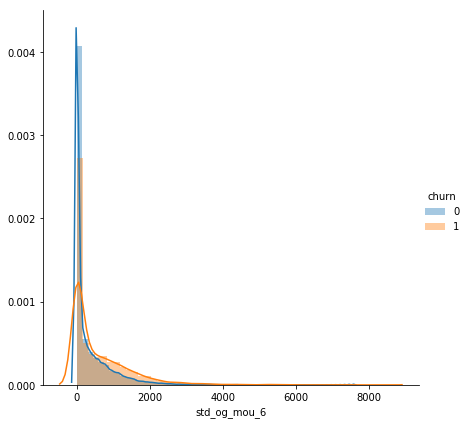

In [75]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_og_mou_6").add_legend()

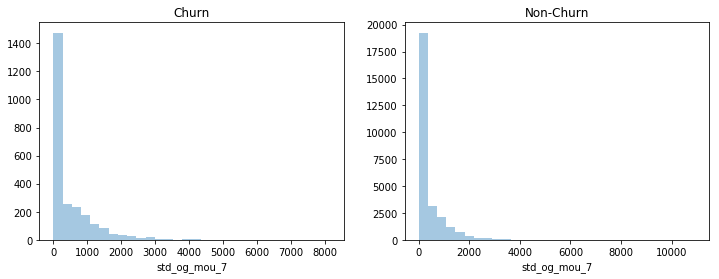

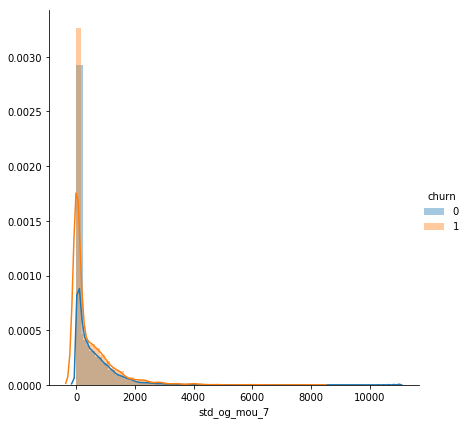

In [76]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_og_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_og_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_og_mou_7").add_legend()

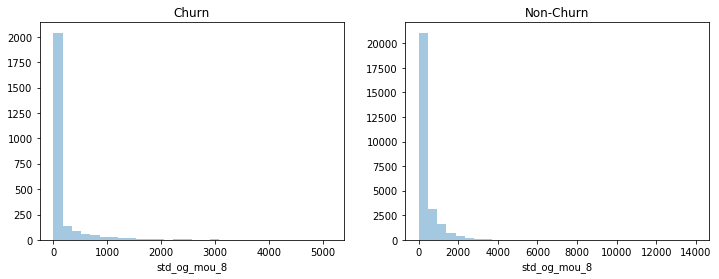

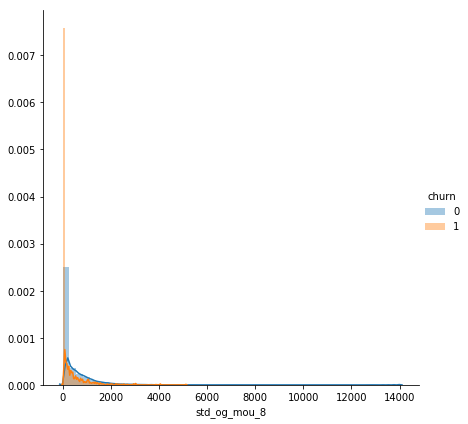

In [77]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_og_mou_8").add_legend()

## isd_og (international calling)

In [78]:
#sns.pairplot(data=Telecom_Gud[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

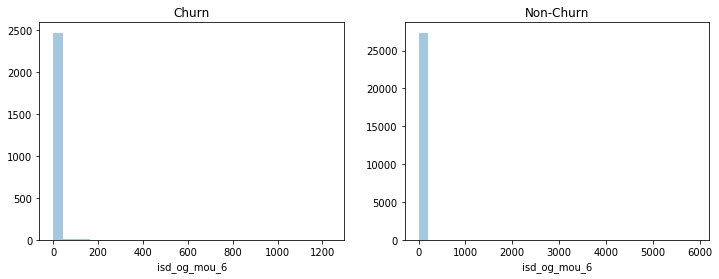

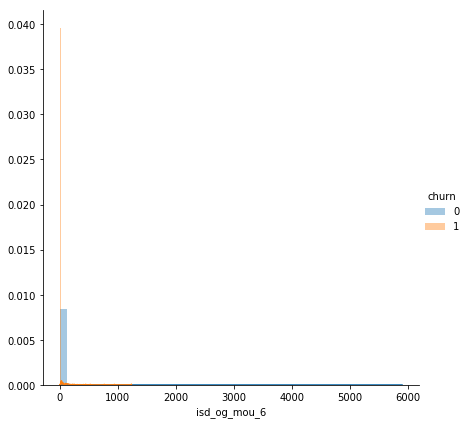

In [79]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"isd_og_mou_6").add_legend()

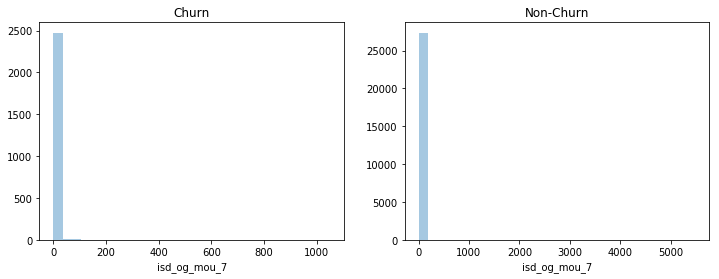

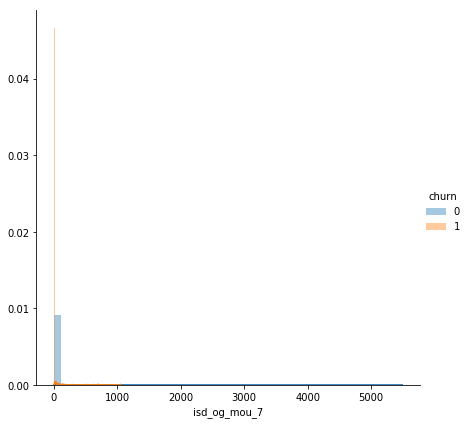

In [80]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].isd_og_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].isd_og_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"isd_og_mou_7").add_legend()

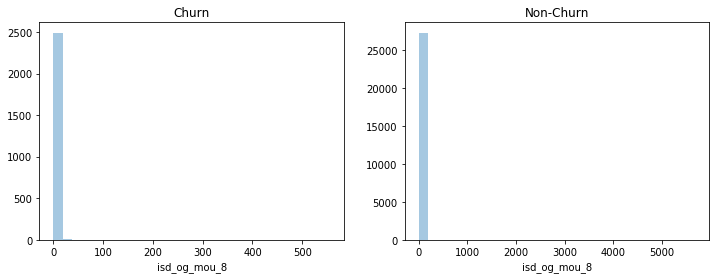

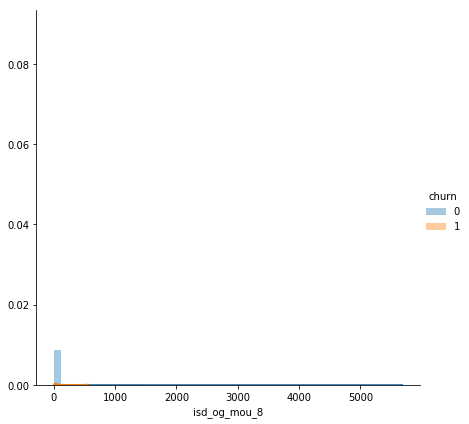

In [81]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].isd_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].isd_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"isd_og_mou_8").add_legend()

## total_og_ (All outgoing calls by the customer)

In [82]:
#sns.pairplot(data=Telecom_Gud[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

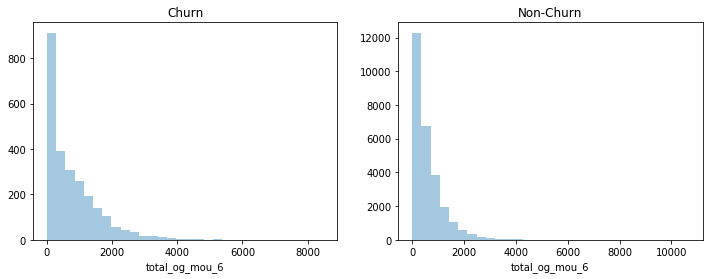

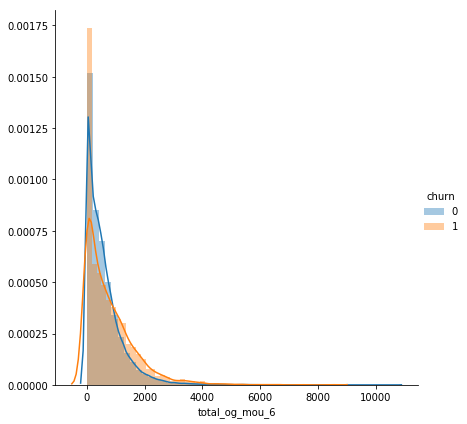

In [83]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_og_mou_6").add_legend()

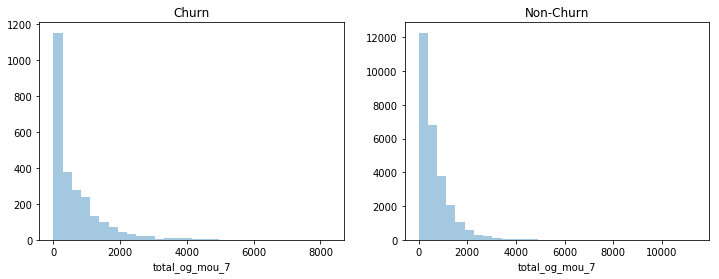

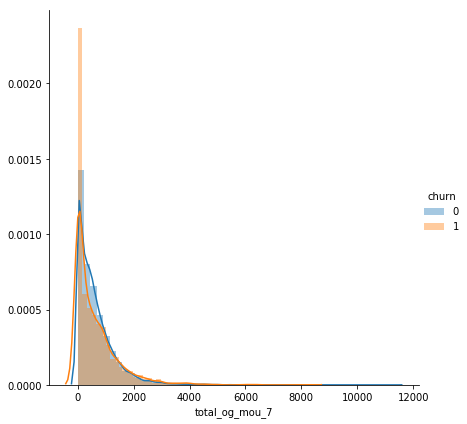

In [84]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_og_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_og_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_og_mou_7").add_legend()

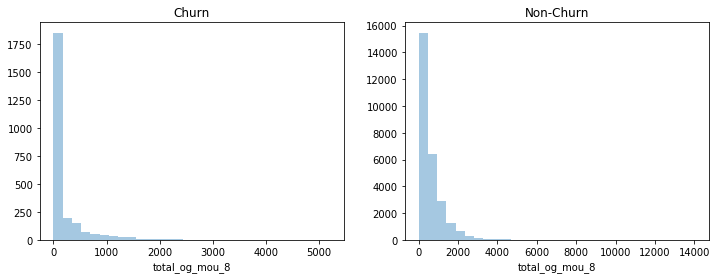

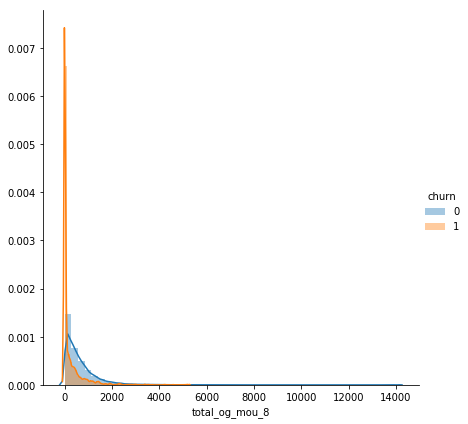

In [85]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_og_mou_8").add_legend()

## loc_ic_ (incoming local calls)

In [86]:
#sns.pairplot(data=Telecom_Gud[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

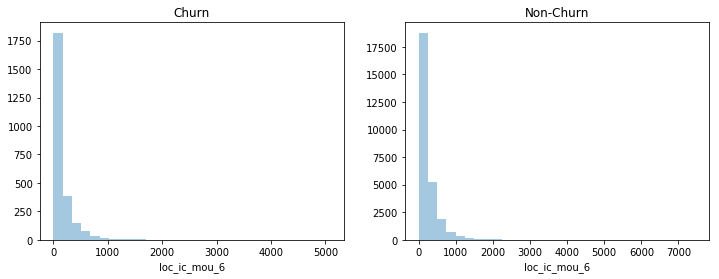

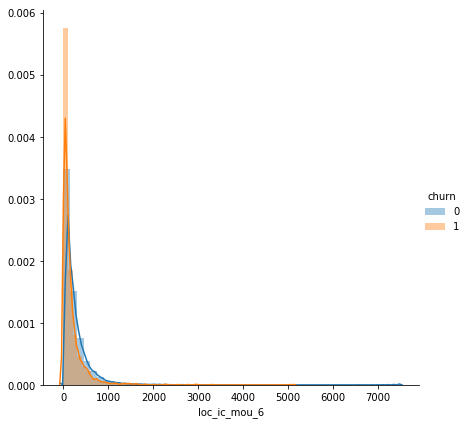

In [87]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_ic_mou_6").add_legend()

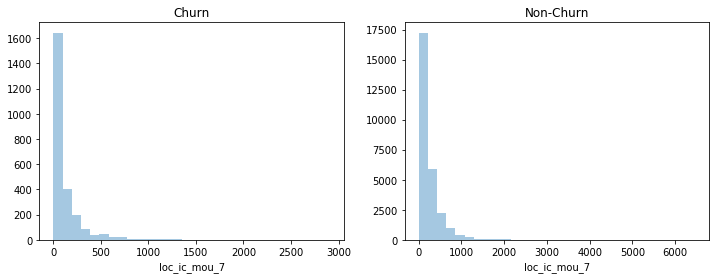

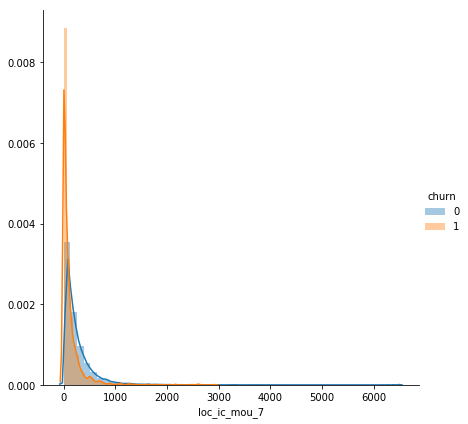

In [88]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_ic_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_ic_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_ic_mou_7").add_legend()

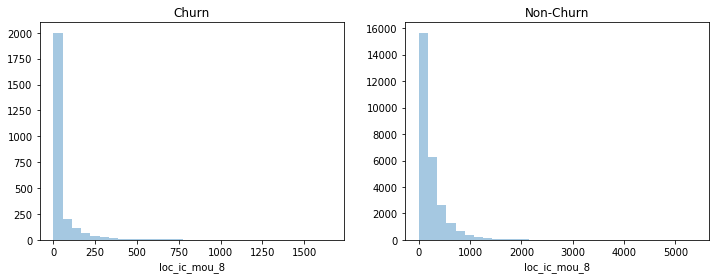

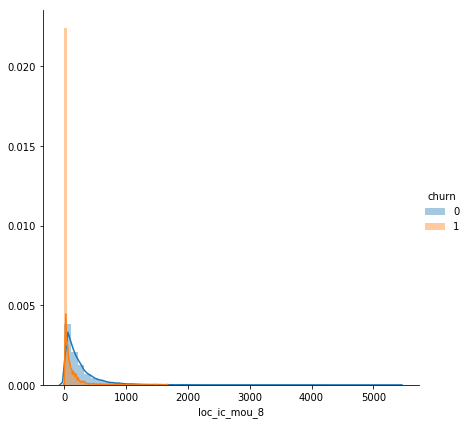

In [89]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].loc_ic_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].loc_ic_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"loc_ic_mou_8").add_legend()

## std_ic_ (Outside circle incoming calls)

In [90]:
#sns.pairplot(data=Telecom_Gud[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

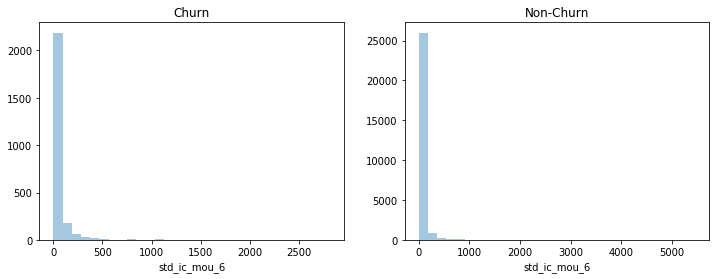

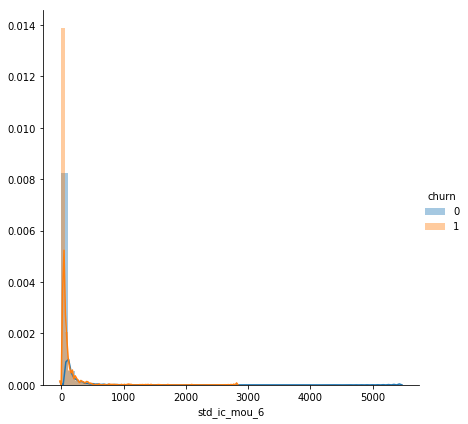

In [91]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_ic_mou_6").add_legend()

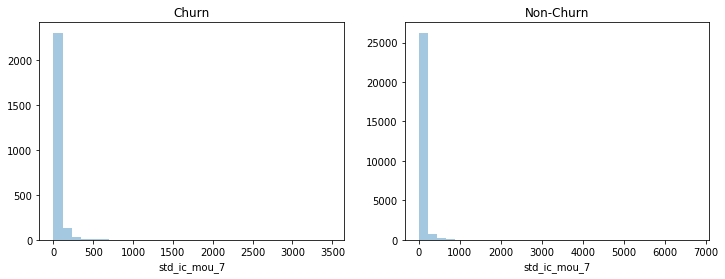

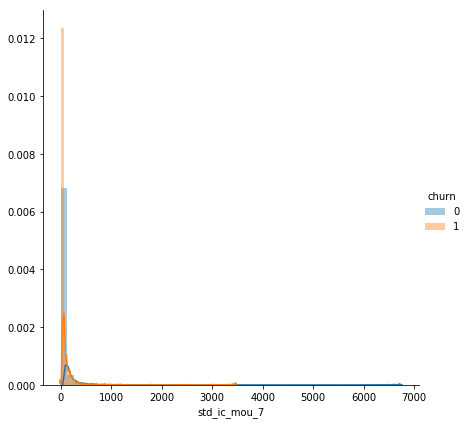

In [92]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_ic_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_ic_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_ic_mou_7").add_legend()

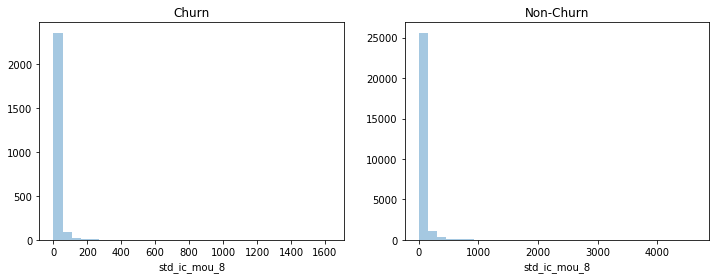

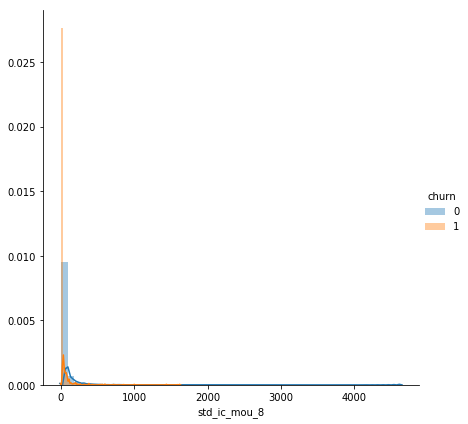

In [93]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].std_ic_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].std_ic_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"std_ic_mou_8").add_legend()

## total_ic_ (All incoming calls received by a person)

In [94]:
#sns.pairplot(data=Telecom_Gud[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

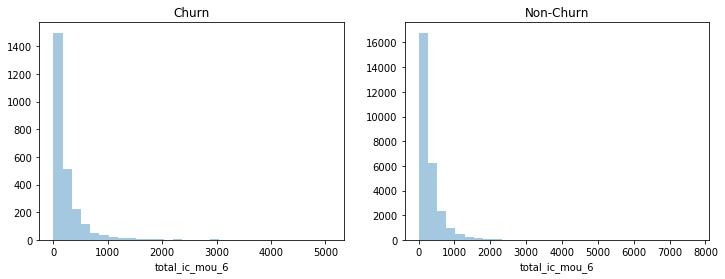

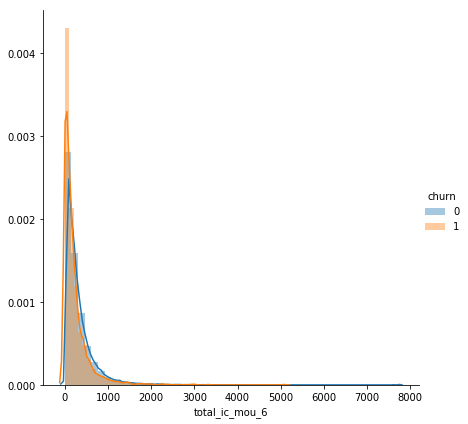

In [95]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_ic_mou_6").add_legend()

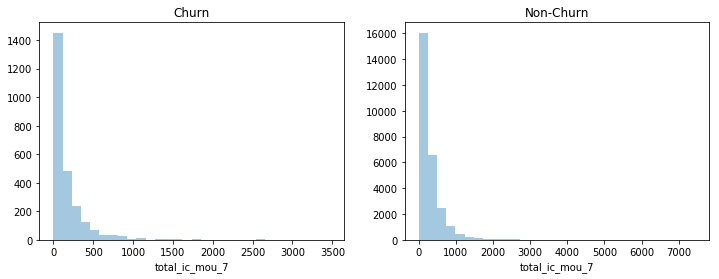

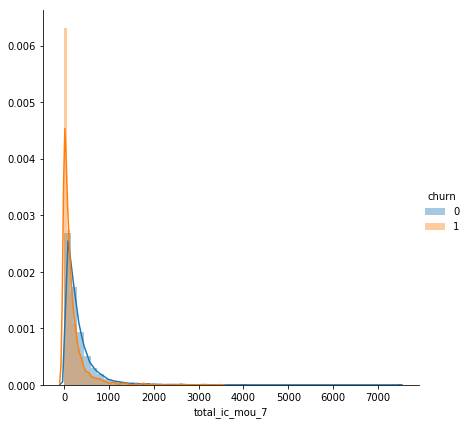

In [96]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_ic_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_ic_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_ic_mou_7").add_legend()

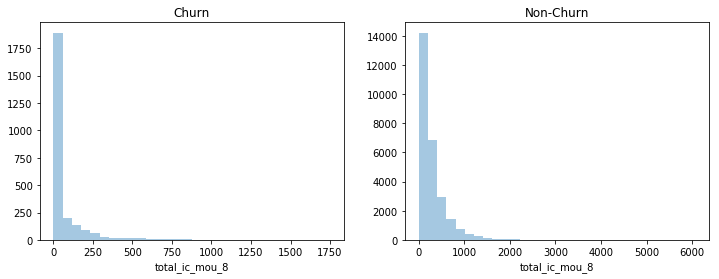

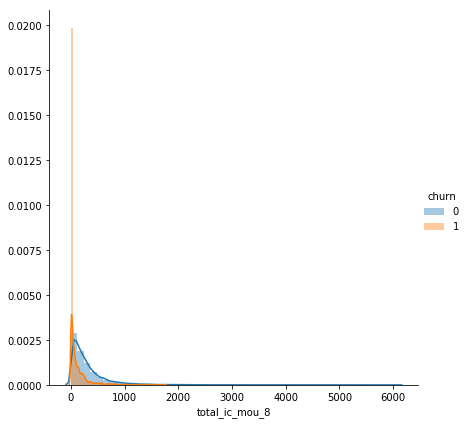

In [97]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_ic_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_ic_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_ic_mou_8").add_legend()

## total_rech_num_ 
#### (Number of times a subscriber recharged his mobile)

In [98]:
#sns.pairplot(data=Telecom_Gud[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

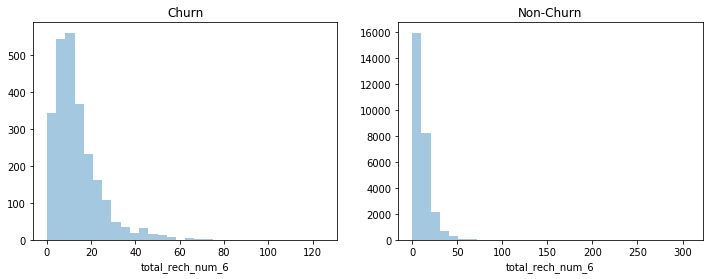

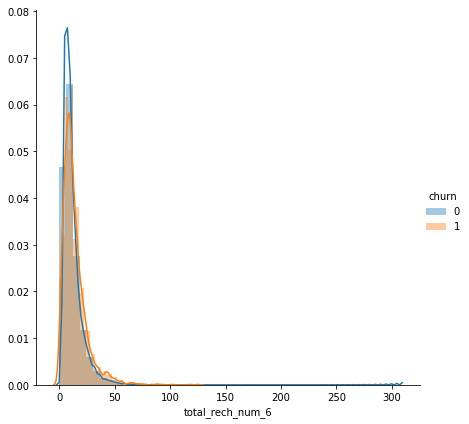

In [99]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

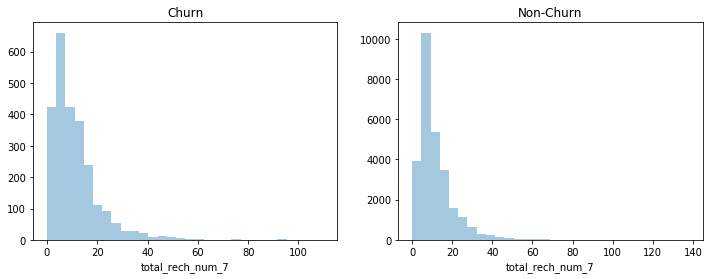

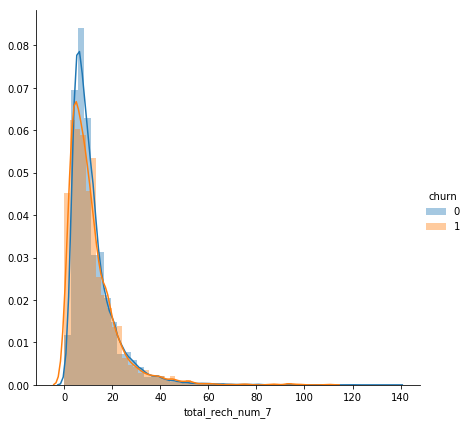

In [100]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_num_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_num_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

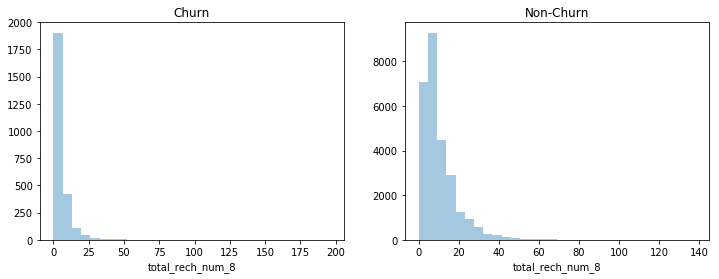

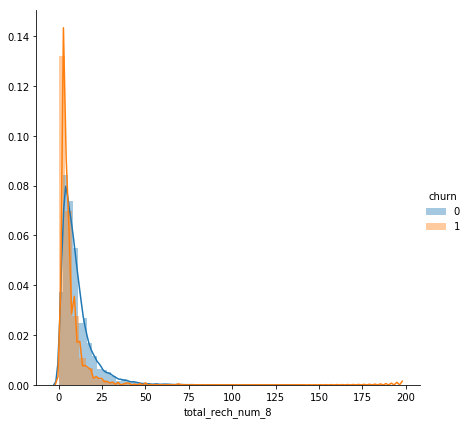

In [101]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_num_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_num_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

## total_rech_amt_
#### Total recharge amount in a particular month

In [102]:
#sns.pairplot(data=Telecom_Gud[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')

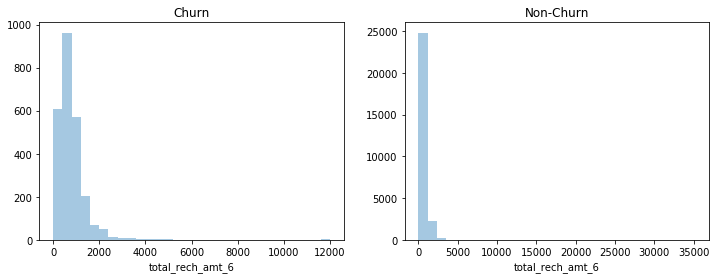

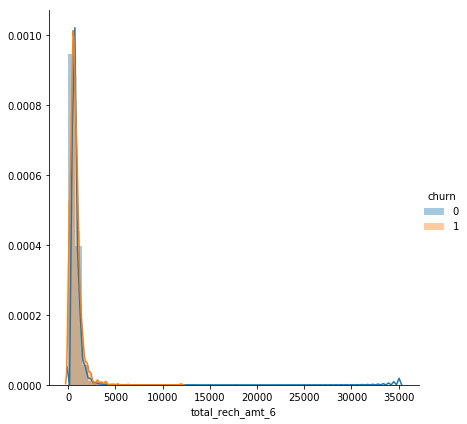

In [103]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

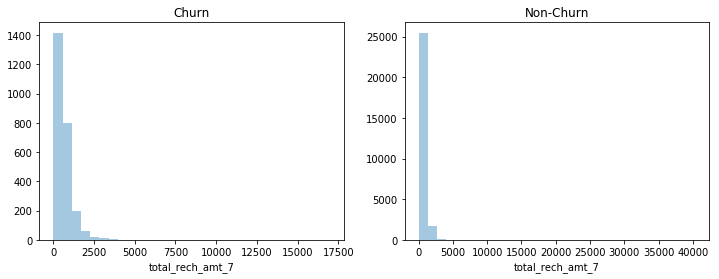

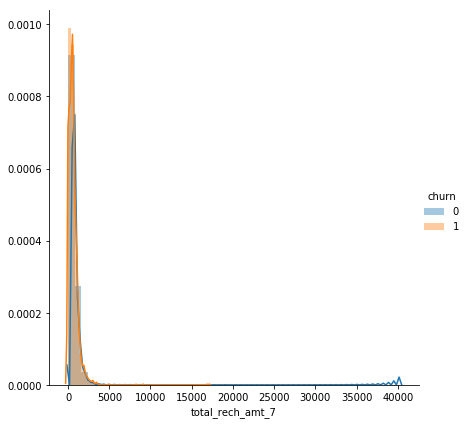

In [104]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_amt_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_amt_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

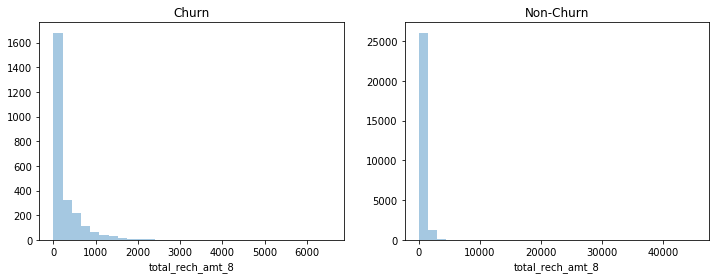

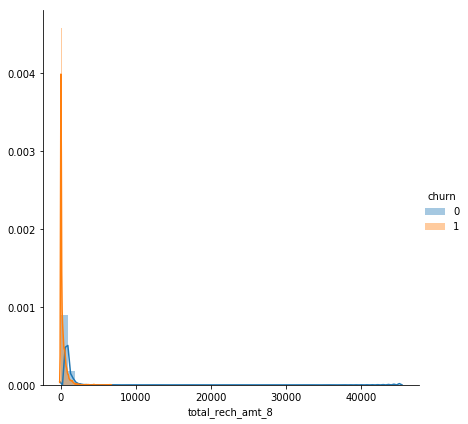

In [105]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_amt_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_amt_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

## total_rech_data_
#### Total number of times mobile data has been recharged

In [106]:
#sns.pairplot(data=Telecom_Gud[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

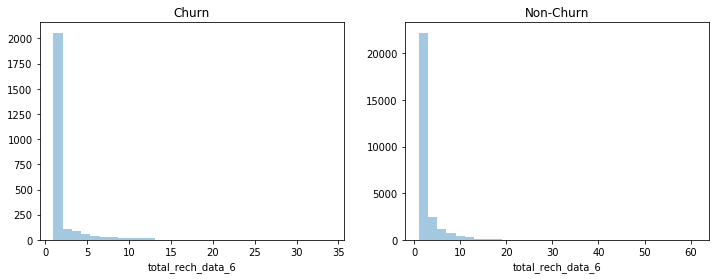

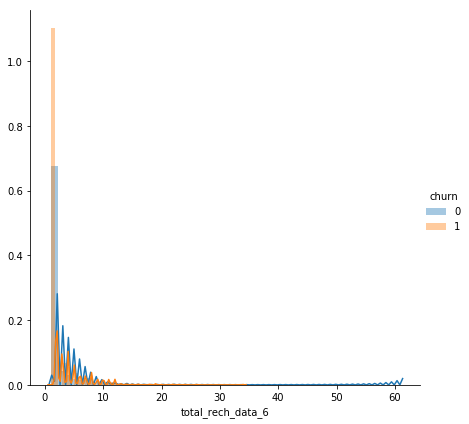

In [107]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_data_6").add_legend()

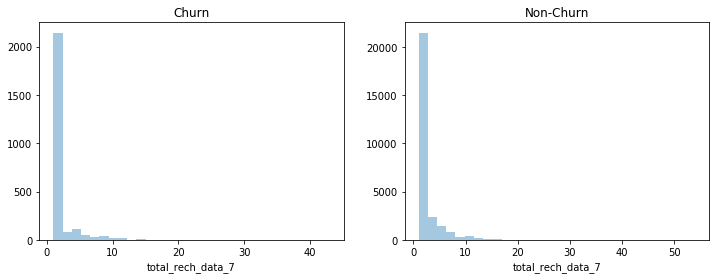

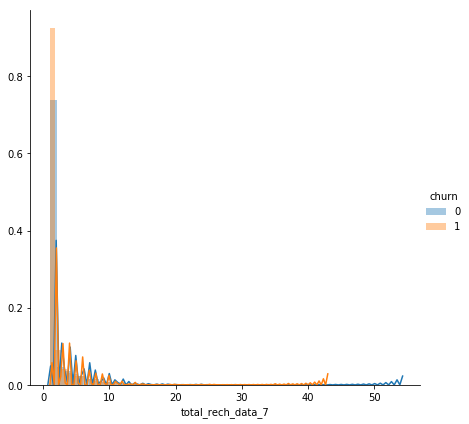

In [108]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_data_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_data_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_data_7").add_legend()

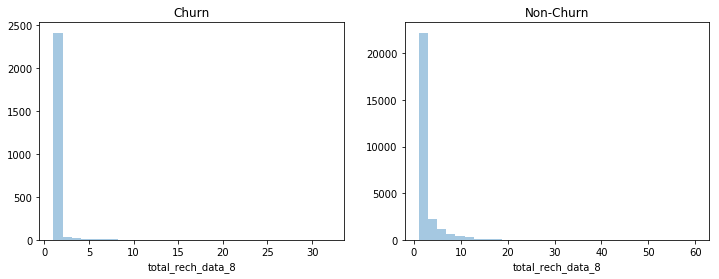

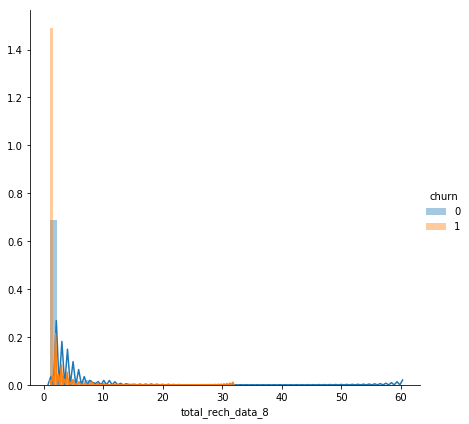

In [109]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].total_rech_data_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].total_rech_data_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"total_rech_data_8").add_legend()

## vol_2g_mb_
#### Internet usage in MB

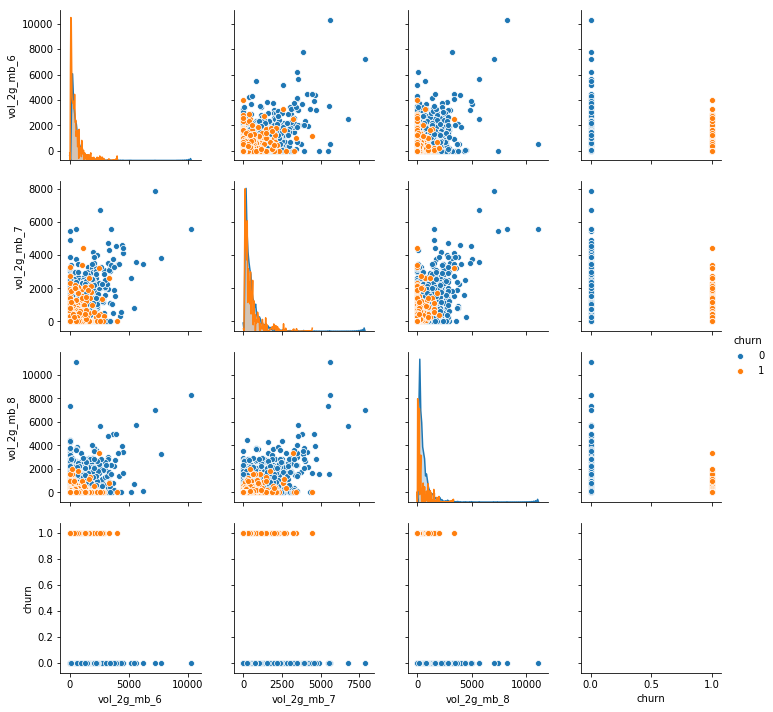

In [110]:
sns.pairplot(data=Telecom_Gud[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

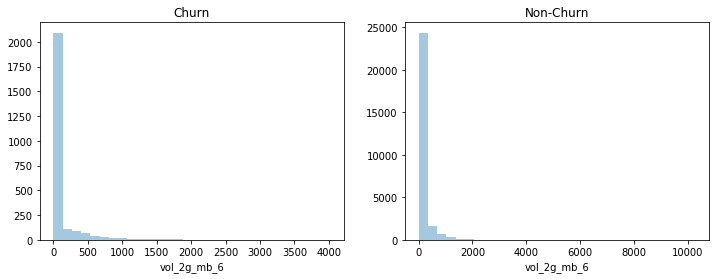

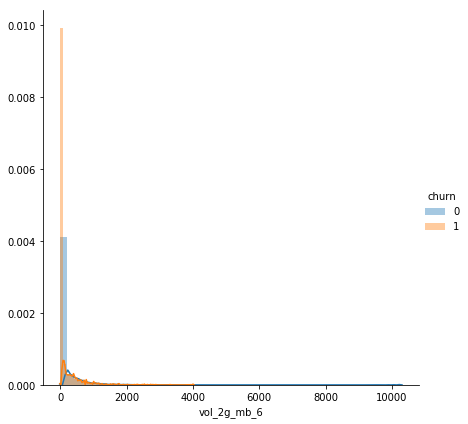

In [111]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"vol_2g_mb_6").add_legend()

## vol_3g_mb_
#### Internet usage in MB

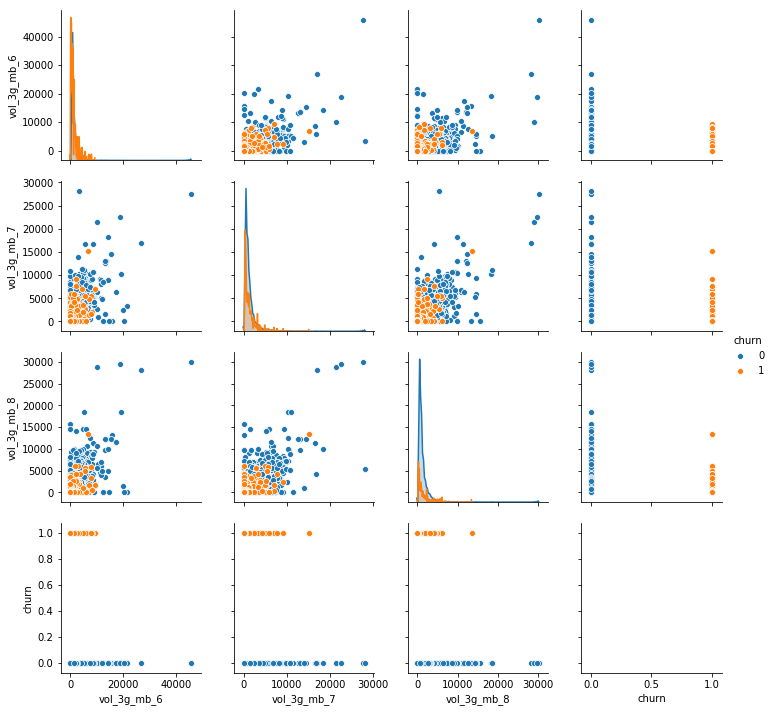

In [112]:
sns.pairplot(data=Telecom_Gud[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

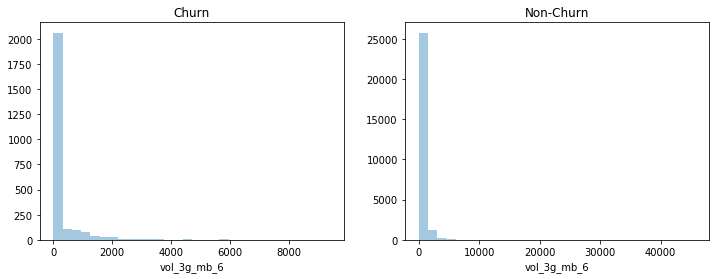

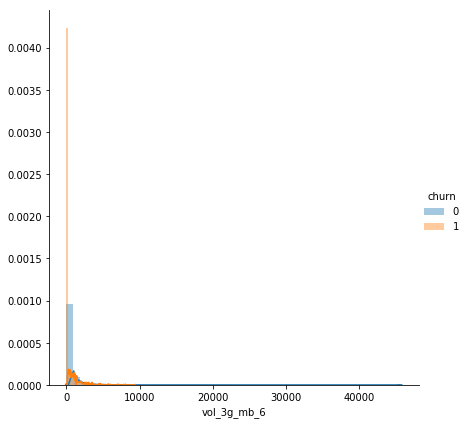

In [113]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"vol_3g_mb_6").add_legend()

## vbc_3g_
#### Volume based cost - paid as per usage

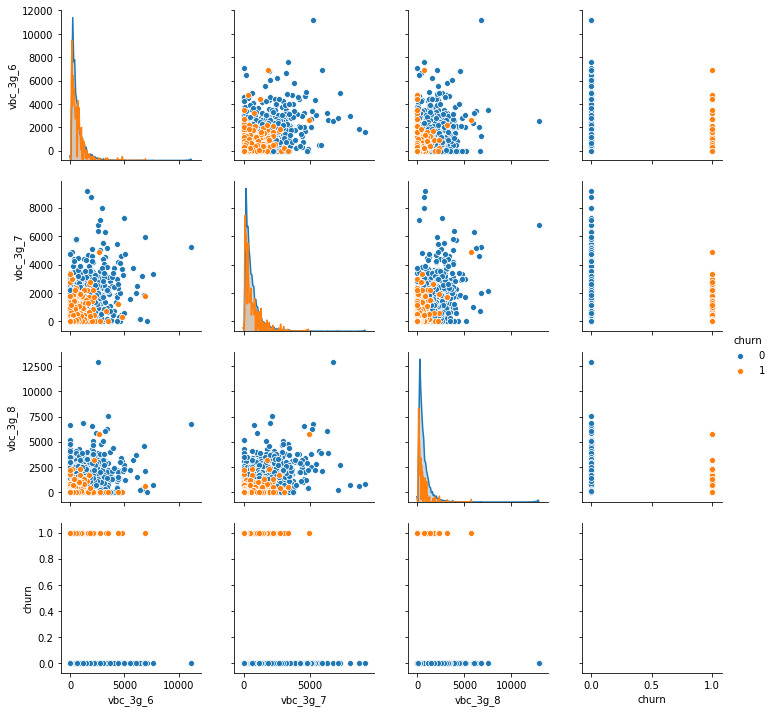

In [114]:
sns.pairplot(data=Telecom_Gud[['vbc_3g_6','vbc_3g_7','vbc_3g_8','churn']],hue='churn')

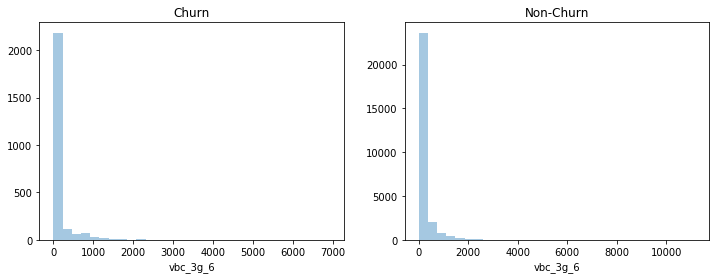

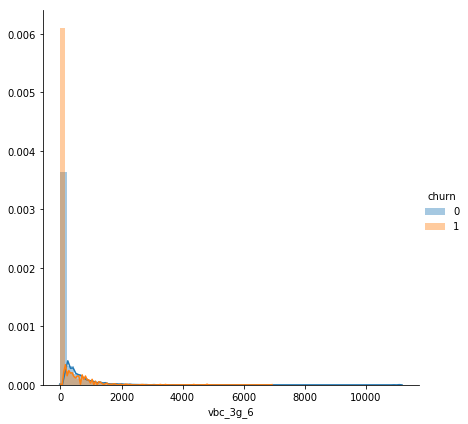

In [115]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==1].vbc_3g_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(Telecom_Gud[Telecom_Gud['churn']==0].vbc_3g_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

sns.FacetGrid(Telecom_Gud,hue='churn',size=6).map(sns.distplot,"vbc_3g_6").add_legend()

We can see few observations across the features, which have a different behavior. If we check the pattern between churn vs non-churn it's almost same across the features. Therefore we can't exclude them from the model point of view.

In [116]:
### Correlation marix

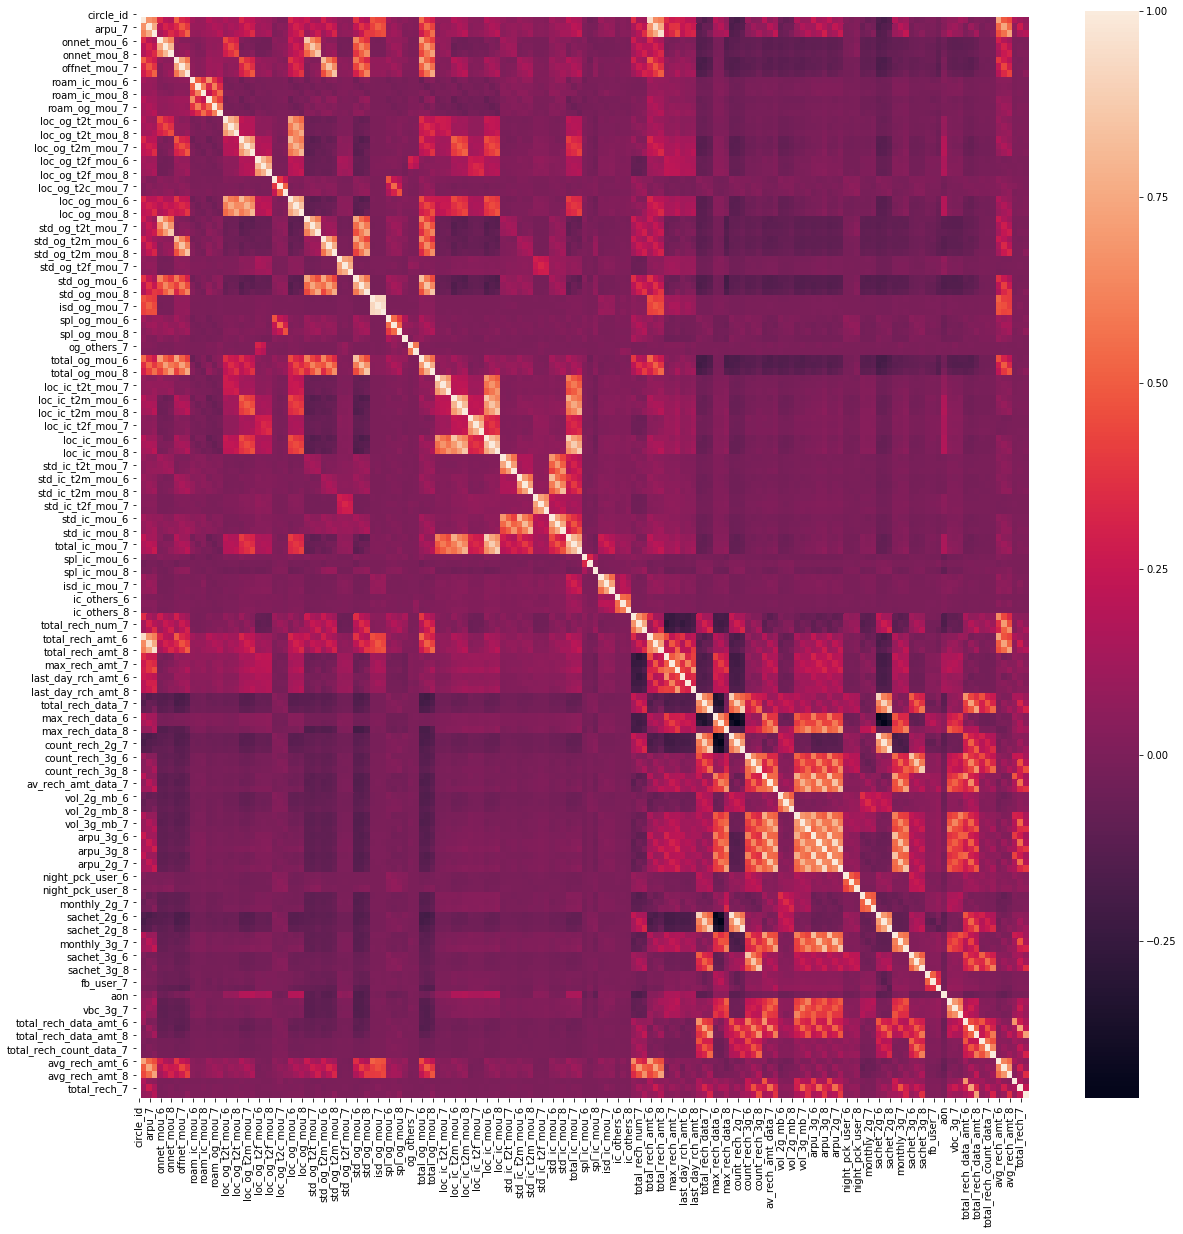

In [117]:
Telecom_GudNew= Telecom_Gud.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(Telecom_GudNew.corr())

In [118]:
# Create correlation matrix
#corr_matrix = Telecom_GudNew.corr().abs()

# Select lower triangle of correlation matrix
#lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
#high_corr_featuresL = [column for column in lower.columns if any(lower[column] > 0.80)]

#print("Length of highly correlated features in the dataset:",len(high_corr_featuresL))
#print(high_corr_featuresL)


In [119]:
# Create correlation matrix
corr_matrix = Telecom_GudNew.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Length of highly correlated features in the dataset:",len(high_corr_features))
print(high_corr_features)

Length of highly correlated features in the dataset: 49
['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


In [120]:
#Create Derived categorical variable
Telecom_Gud['aon_bin'] = pd.cut(telecomDF['aon'], range(0,telecomDF['aon'].max(),365), labels=range(0,int(round(telecomDF['aon'].max()/365))-1))

In [121]:
def graph_avgCallMonth(pltType,data,calltype,col):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with col features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[col].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
  
    plt.show()

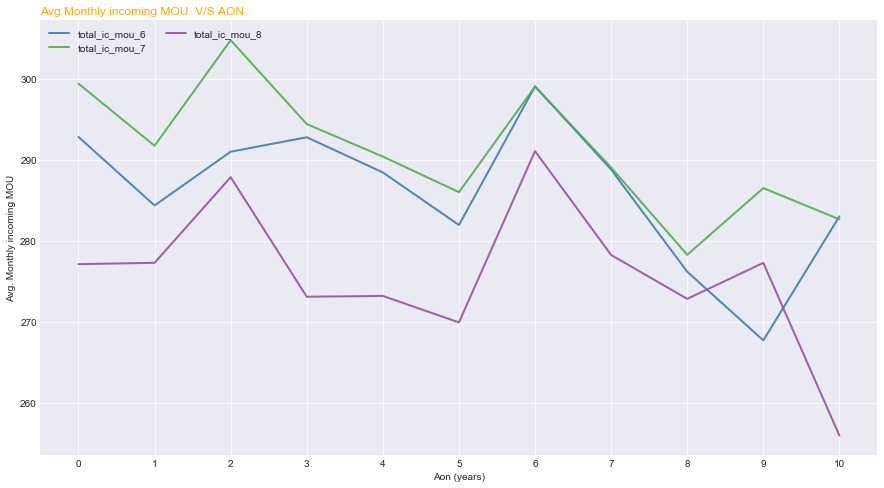

In [122]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = Telecom_Gud.filter(regex ='total_ic_mou').columns

graph_avgCallMonth('multi',Telecom_Gud,calltype='incoming',col=ic_col)

It is evident from the plot that,
Total Incoming MOU avg. for Jul(7) are more than the previous Jun(6) for customers in all AON bands.
Total Incoming MOU avg. for Aug(8) cease to increace, infact it shows a decline compared to Jul(7).

Although the Total incoming mou avg inceases from jun to july, it drop little in aug and reduces lower than that for jun.


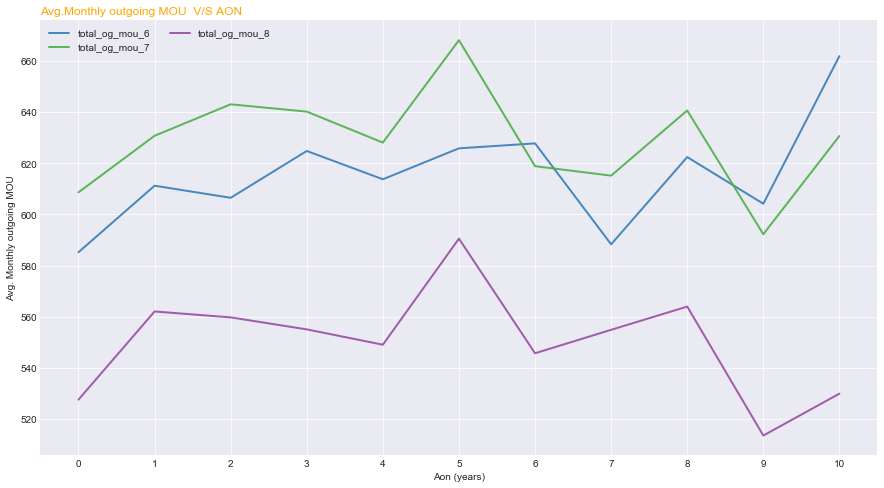

In [123]:
#outgoing

# Plotting Avg. total monthly incoming MOU vs AON
ic_col = Telecom_Gud.filter(regex ='total_og_mou').columns

graph_avgCallMonth('multi',Telecom_Gud,calltype='outgoing',col=ic_col)

Insights:-

Overall, the Avg. total outgoing usage reduces with the increasing age on network.
Total Outgoing MOU avg. for Jul(7) are more than the previous Jun(6) for customers in all AON bands
Total outgoing MOU avg. for Aug(8) cease to increace, infact it shows a significant decline compared to Jul(7).

The Avg. outgoing usage reduces drastically for customers in the AON band between 9 - 10 years.

### Feature Engineering

In [124]:
#dropping variables not required for analysis

In [125]:
Telecom_Gud.drop(['circle_id','aon_bin'], axis=1, inplace=True)

In [126]:
#Telecom_Gud.drop('aon_bin', axis=1, inplace=True)

In [127]:
Telecom_Gud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29901 entries, 0 to 29900
Columns: 171 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(135), int32(1), int64(29)
memory usage: 38.9 MB


In [128]:
# removing the datatime columns before PCA
dateTimeCols=Telecom_Gud.select_dtypes(include=['datetime64']).columns
#=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
print(dateTimeCols)


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')


In [129]:
#DROPPING
Telecom_Gud.drop(dateTimeCols, axis=1, inplace=True)

In [130]:
#Create X, y variables
X = Telecom_Gud.drop(['churn'],axis=1)
y = Telecom_Gud['churn']

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [132]:
X_train.shape
#X_test.shape

(20930, 164)

In [133]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [134]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [135]:
print("X_train Dataframe Shape :",X_train.shape)
print("X_test Dataframe Shape :",X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: ",y_train_imb)
print("Imbalance in Test Data: ",y_test_imb)

X_train Dataframe Shape : (20930, 164)
X_test Dataframe Shape : (8971, 164)
Imbalance in Train Data:  0.09209496477954605
Imbalance in Test Data:  0.0910970566772075


## SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1)
X_tr_im,y_tr_im = sm.fit_sample(X_train,y_train)
print(X_tr_im.shape)
print(y_tr_im.shape)
np.count_nonzero(y_tr_im)

(38330, 164)
(38330,)


19165

In [137]:
print("X_tr Dataframe Shape ",X_tr_im.shape)
print("y_tr Dataframe Shape ",y_tr_im.shape)

data_imbalance = (y_tr_im != 0).sum()/(y_tr_im == 0).sum()
print("Imbalance in Train Data: ",data_imbalance)

X_tr Dataframe Shape  (38330, 164)
y_tr Dataframe Shape  (38330,)
Imbalance in Train Data:  1.0


## PCA 

In [138]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [139]:
#Doing the PCA on the train data
pca.fit(X_tr_im)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [140]:
pca.components_

array([[ 9.09951225e-01,  1.42139945e-03,  2.93235598e-03, ...,
        -3.52106200e-05, -8.62399976e-05,  2.78900647e-04],
       [-1.04752486e-01,  3.61419254e-03,  3.95414514e-03, ...,
        -5.87282135e-04, -1.45091304e-03, -1.38092968e-03],
       [ 3.93455493e-01,  1.43975713e-03, -1.03743166e-03, ...,
         5.26561855e-05,  4.19587054e-05, -1.06728344e-03],
       ...,
       [ 0.00000000e+00, -4.26957149e-16,  1.48255869e-16, ...,
        -1.39185681e-16, -4.30361575e-16,  3.60107850e-16],
       [ 0.00000000e+00, -1.00155968e-16, -3.48195007e-16, ...,
        -4.83330380e-16, -2.63876492e-16, -2.39256377e-16],
       [ 0.00000000e+00,  5.18290229e-16,  3.71523344e-16, ...,
        -3.54661045e-17,  6.53779537e-17, -3.31673904e-16]])

In [141]:
Xnew=pd.DataFrame(X_tr_im)
colnames = list(Xnew.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()


,PC1,PC2,Feature
0,0.909951,-0.104752,0
1,0.001421,0.003614,1
2,0.002932,0.003954,2
3,0.004694,0.002366,3
4,-0.006576,0.055929,4


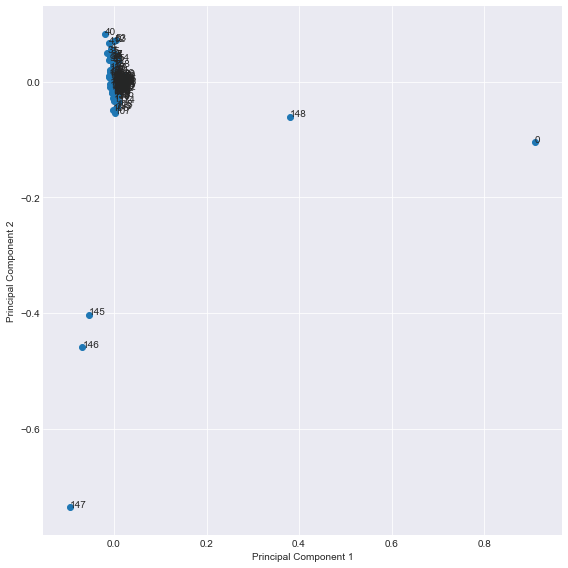

In [142]:
#%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Looking at the screeplot to assess the number of needed principal components

In [143]:
pca.explained_variance_ratio_

array([2.08266481e-01, 1.26568399e-01, 9.00761536e-02, 6.66767827e-02,
       5.54488277e-02, 4.56983949e-02, 4.11829445e-02, 3.60398268e-02,
       3.03197993e-02, 2.84598103e-02, 2.60482352e-02, 2.36307529e-02,
       1.69222514e-02, 1.53228773e-02, 1.37606603e-02, 1.08338461e-02,
       1.02707044e-02, 9.15286362e-03, 8.74426160e-03, 7.68104780e-03,
       7.27111217e-03, 6.82673139e-03, 6.39967407e-03, 5.75757586e-03,
       5.63748884e-03, 5.25398224e-03, 4.98318193e-03, 4.75718482e-03,
       4.63636670e-03, 4.33174696e-03, 3.75524719e-03, 3.50347772e-03,
       3.37556909e-03, 2.89531330e-03, 2.71389580e-03, 2.67220186e-03,
       2.56912397e-03, 2.48761662e-03, 2.36462538e-03, 2.14399205e-03,
       2.01751295e-03, 1.91681508e-03, 1.74494021e-03, 1.69849425e-03,
       1.61840582e-03, 1.52073251e-03, 1.48104461e-03, 1.37417028e-03,
       1.31884887e-03, 1.27319070e-03, 1.20054352e-03, 1.19189269e-03,
       1.14840242e-03, 1.07526433e-03, 9.87649220e-04, 9.75322792e-04,
      

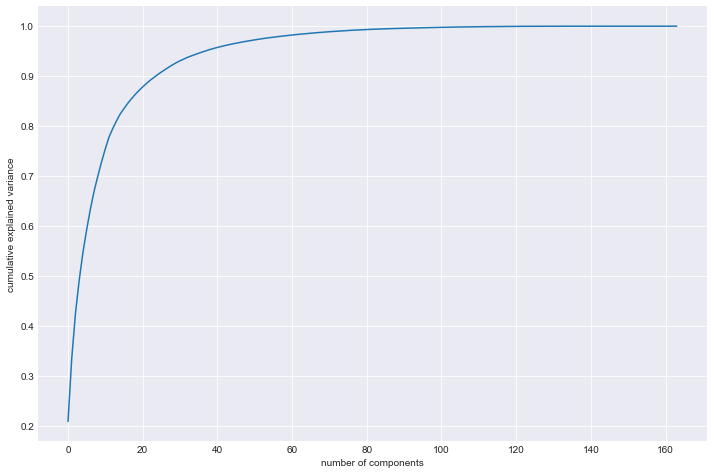

In [144]:
#Making the screeplot - plotting the cumulative variance against the number of components
#%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [145]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [146]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=35, whiten=False)

### Basis transformation - getting the data onto our PCs

In [147]:
X_train_pca = pca_final.fit_transform(X_tr_im)
X_train_pca.shape

(38330, 35)

In [148]:
X_train_pca

array([[-0.40022134,  0.04055346,  0.00998881, ..., -0.00080589,
        -0.03050523, -0.00703809],
       [-0.52434794,  0.00564657,  0.01097188, ...,  0.03557545,
        -0.01811901,  0.00077808],
       [-0.18175962, -0.02400794, -0.15690784, ...,  0.01334285,
        -0.01057846,  0.00113783],
       ...,
       [ 0.21126675,  0.06941157, -0.08809737, ...,  0.01306079,
         0.00851074,  0.00567097],
       [ 0.22600091,  0.10548835, -0.20603848, ...,  0.04823255,
         0.01327062,  0.02453617],
       [-0.48640043, -0.07238563, -0.06689852, ..., -0.01406581,
         0.00677119,  0.00436995]])

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [149]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

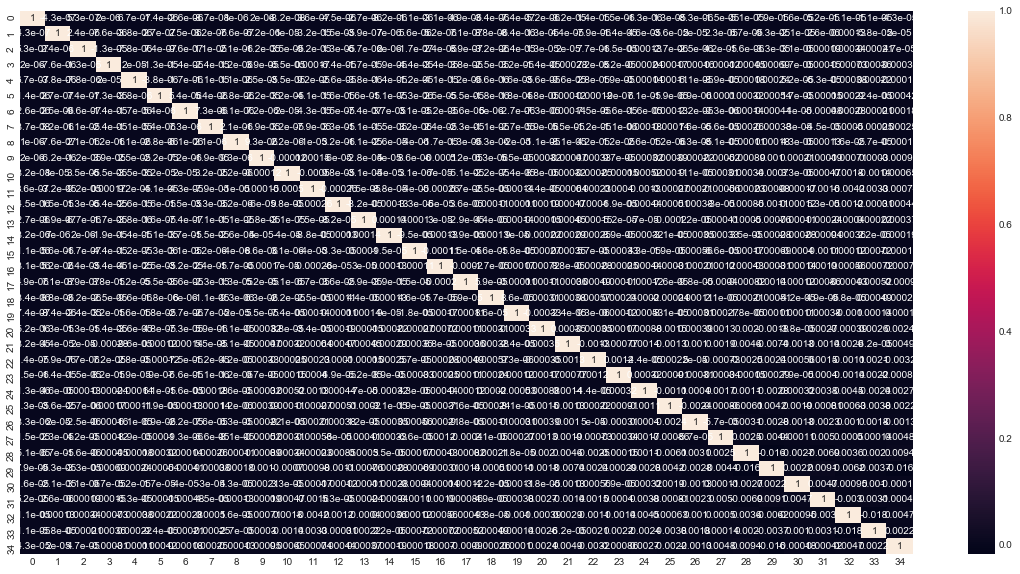

In [150]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [151]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009387160936909647 , min corr:  -0.01764330609876408


#### Indeed - there is no correlation between any two components! Good job, PCA!
 - We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [152]:
#Applying selected components to the test data - 
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8971, 35)

In [153]:
X_test_pca

array([[ 0.03341186,  0.03172911, -0.09074375, ..., -0.00813277,
        -0.00255891, -0.00665679],
       [ 0.07504045,  0.12166082,  0.03112825, ...,  0.0227347 ,
        -0.00264296,  0.01844394],
       [-0.18749711, -0.01799708, -0.01467755, ..., -0.00822395,
         0.0060144 , -0.00393295],
       ...,
       [ 0.26227064,  0.07875504, -0.24934325, ..., -0.01972927,
        -0.04427773, -0.00154081],
       [ 0.31291291,  0.04290556, -0.3245581 , ..., -0.03541669,
         0.00761393, -0.01096016],
       [ 0.05406163, -0.36642263, -0.0542479 , ...,  0.06478182,
         0.05961438,  0.01254554]])

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

### Logistic Regression

In [154]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')


In [155]:
model_pca=learner_pca.fit(X_train_pca,y_tr_im)
model_pca

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

#### Making Predictions on Train set

In [156]:
#Prediction training set
train_pred = model_pca.predict(X_train_pca)


In [157]:
#Making prediction probability on the train data

pred_probs_train = model_pca.predict_proba(X_train_pca)[:,1]


In [158]:
print("roc_auc_score(Train) with PCA : {:2.4}".format(metrics.roc_auc_score(y_tr_im, pred_probs_train)))
print("Accuracy(Train) with PCA : {:2.4}".format(metrics.accuracy_score(y_tr_im,train_pred)))
print("Recall(Train) with PCA : {:2.4}".format(metrics.recall_score(y_tr_im,train_pred)))
print("Precision(Train) with PCA : {:2.4}".format(metrics.precision_score(y_tr_im,train_pred)))

roc_auc_score(Train) with PCA : 0.9055
Accuracy(Train) with PCA : 0.8373
Recall(Train) with PCA : 0.8593
Precision(Train) with PCA : 0.8231


In [159]:
# Churn and Churn Probability with Cut off
cut_off=0.5
y_train_pred_final= pd.DataFrame({'churn':y_tr_im, 'churn_Prob':pred_probs_train})


y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_pred_final.head()

,churn,churn_Prob,predicted
0,0,0.252384,0
1,0,0.224386,0
2,0,0.882696,1
3,0,0.725535,1
4,1,0.849926,1


In [160]:
# Let's check the overall metrics
print("*** LR Model Metrics after probability cutoff in Train Data***")
print("Accuracy with PCA : {:2.4}".format(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)))
print("Recall with PCA : {:2.4}".format(metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)))
print("Precision with PCA : {:2.4}".format(metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)))

*** LR Model Metrics after probability cutoff in Train Data***
Accuracy with PCA : 0.8373
Recall with PCA : 0.8593
Precision with PCA : 0.8231


## Metrics beyond simply accuracy

In [161]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[15625,  3540],
       [ 2696, 16469]], dtype=int64)

In [162]:

# Let's take a look at the confusion matrix again 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(" ---Train Metrics--- ")
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_tr_im, pred_probs_train)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {:2.4}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {:2.4}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: {:2.4}'.format(FP/ float(TN+FP)))
# positive predictive value 
print('Positive predictive value: {:2.4}'.format(TP / float(TP+FP)))
# Negative predictive value
print('Negative Predictive value: {:2.4}'.format(TN / float(TN+ FN)))
# sklearn precision score value 
#print('sklearn precision score value: {}'.format(metrics.precision_score(y_tr_im, pred_probs_train )))


 ---Train Metrics--- 
Roc_auc_score : 0.9054933045029132
Sensitivity/Recall : 0.8593
Specificity: 0.8153
False Positive Rate: 0.1847
Positive predictive value: 0.8231
Negative Predictive value: 0.8528


### Plotting the ROC Curve

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, drop_intermediate = False )

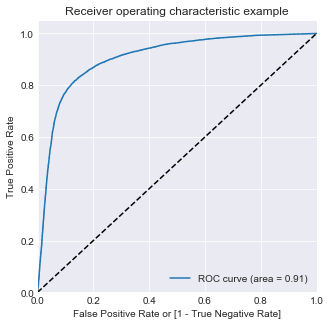

In [165]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

The roc curve is lying in the top left corner which is a sign of a good fit.

### Finding Optimal Cutoff Point

In [166]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.252384,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224386,0,1,1,1,0,0,0,0,0,0,0
2,0,0.882696,1,1,1,1,1,1,1,1,1,1,0
3,0,0.725535,1,1,1,1,1,1,1,1,1,0,0
4,1,0.849926,1,1,1,1,1,1,1,1,1,1,0


In [167]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679963  0.979546  0.380381
0.2   0.2  0.747978  0.958518  0.537438
0.3   0.3  0.790973  0.930290  0.651657
0.4   0.4  0.820924  0.899609  0.742238
0.5   0.5  0.837308  0.859327  0.815288
0.6   0.6  0.841273  0.808192  0.874354
0.7   0.7  0.826663  0.734516  0.918810
0.8   0.8  0.757762  0.562275  0.953248
0.9   0.9  0.589147  0.193582  0.984712


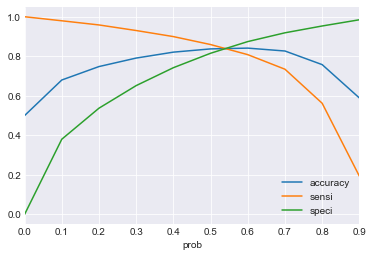

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


From the curve above, 0.55 is the optimum point . Although, other cutoff between 0.5 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.55. At this point there is a balance of sensitivity, specificity and accuracy.



In [261]:
#Probabiity in each cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.252384,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224386,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.882696,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.725535,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.849926,1,1,1,1,1,1,1,1,1,1,0,1


In [262]:
confusiontr = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
#confusiontr# Let's take a look at the confusion matrix again 

TP1 = confusiontr[1,1] # true positive 
TN1 = confusiontr[0,0] # true negatives
FP1 = confusiontr[0,1] # false positives
FN1= confusiontr[1,0] # false negatives

print(" ---Train Metrics After optimum cut off--- ")

# Let's check the overall accuracy.
accuracyTR=metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)
print("Accuracy : {:2.4}".format(accuracyTR))

rocTR=metrics.roc_auc_score(y_tr_im, pred_probs_train)
print("Roc_auc_score : {:2.4}".format(rocTR))

# Let's see the sensitivity of our logistic regression model
SensitivityTR=TP1 / float(TP1+FN1)
print('Sensitivity/Recall : {:2.4}'.format(SensitivityTR))

# Let us calculate specificity
SpecificityTR=TN1 / float(TN1+FP1)
print('Specificity : {:2.4}'.format(SpecificityTR))

# Calculate false postive rate - predicting churn when customer does not have churned
fprTR=FP1/ float(TN1+FP1)
print('False Positive Rate: {:2.4}'.format(fprTR))

# positive predictive value 
prTR=TP1 / float(TP1+FP1)
print('Positive predictive value: {:2.4}'.format(prTR))

# Negative predictive value
nrTR=TN1 / float(TN1+ FN1)
print('Negative Predictive value: {:2.4}'.format(nrTR))

# sklearn precision score value 
#print('sklearn precision score value: {:2.4}'.format(metrics.precision_score(y_test, pred_probs_test )))



 ---Train Metrics After optimum cut off--- 
Accuracy : 0.8384
Roc_auc_score : 0.9055
Sensitivity/Recall : 0.8487
Specificity : 0.828
False Positive Rate: 0.172
Positive predictive value: 0.8315
Negative Predictive value: 0.8455


### Making predictions on the test set

In [263]:
# Prediction on the test data
y_pred = learner_pca.predict(X_test_pca)


In [265]:
#Making predicted probabilities on the test data with cut_off

pred_probs_test = learner_pca.predict_proba(X_test_pca)[:,1]

cut_off_prob=0.52

# predict
y_test_pred_final= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_test})

# Creating new column 'predicted' with 1 if Churn_Prob>0.52 else 0
y_test_pred_final['predicted'] = y_test_pred_final.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)


y_test_pred_final.head()


,churn,churn_Prob,predicted
4265,0,0.520855,1
29216,0,0.082957,0
974,0,0.828559,1
1602,0,0.542851,1
25454,0,0.019488,0


In [266]:
# Let's check the overall accuracy.
print("Accuracy (Test) :  {:2.4}".format(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)))


Accuracy (Test) :  0.821


In [267]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted )
confusion2



array([[6751, 1471],
       [ 135,  614]], dtype=int64)

In [268]:

# Let's take a look at the confusion matrix again 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print(" ---Test Metrics--- ")

# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)
print("Accuracy (Test) :  {:2.4}".format(accuracy))

roc_score=metrics.roc_auc_score(y_test,pred_probs_test)
print("Roc_auc_score : {:2.4}".format(roc_score))

# Let's see the sensitivity of our logistic regression model
Sensitivity=TP / float(TP+FN)
print('Sensitivity/Recall : {:2.4}'.format(Sensitivity))

# Let us calculate specificity
Specificity=TN / float(TN+FP)
print('Specificity : {:2.4}'.format(Specificity))

# Calculate false postive rate - predicting churn when customer does not have churned
FPR=FP/ float(TN+FP)
print('False Positive Rate: {:2.4}'.format(FPR))

# positive predictive value 
PR=TP / float(TP+FP)
print('Positive predictive value: {:2.4}'.format(PR))

# Negative predictive value
NR=TN / float(TN+ FN)
print('Negative Predictive value: {:2.4}'.format(NR))

# sklearn precision score value 
#print('sklearn precision score value: {:2.4}'.format(metrics.precision_score(y_test, pred_probs_test )))


 ---Test Metrics--- 
Accuracy (Test) :  0.821
Roc_auc_score : 0.8805
Sensitivity/Recall : 0.8198
Specificity : 0.8211
False Positive Rate: 0.1789
Positive predictive value: 0.2945
Negative Predictive value: 0.9804


#### The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.


In [269]:
print("###   Model Metrics Logistic Regression   ###")
print("TRAIN ==> Accuracy :{0:.2%}".format(accuracyTR)+ " ,Sensitivity/Recall : {0:.2%}".format(SensitivityTR) +"  ,Specificity :{0:.2%}".format(SpecificityTR)+"  ,roc auc score  :{0:.2%}".format(rocTR))
print("TEST ==>  Accuracy :{0:.2%}".format(accuracy)+ " ,Sensitivity/Recall : {0:.2%}".format(Sensitivity) +"  ,Specificity :{0:.2%}".format(Specificity)+"  ,roc auc score  :{0:.2%}".format(roc_score))


###   Model Metrics Logistic Regression   ###
TRAIN ==> Accuracy :83.84% ,Sensitivity/Recall : 84.87%  ,Specificity :82.80%  ,roc auc score  :90.55%
TEST ==>  Accuracy :82.10% ,Sensitivity/Recall : 81.98%  ,Specificity :82.11%  ,roc auc score  :88.05%


###  Decision Tree

##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [177]:
# Importing required packages for visualization
from IPython.display import Image  

import pydotplus, graphviz
from sklearn.model_selection import cross_val_score


In [178]:
dtree = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)



In [179]:

cv_folds=5
#Fit the algorithm on the data
model_dtree=dtree.fit(X_train_pca,y_tr_im)

#Predict training set:
dtrain_pred = model_dtree.predict(X_train_pca)
dtrain_predprob = model_dtree.predict_proba(X_train_pca)[:,1]


In [180]:
# make predicted probability on test
pred_probs_testT = dtree.predict(X_test_pca)


In [181]:


confusionT = metrics.confusion_matrix(y_test, pred_probs_testT)

# Let's take a look at the confusion matrix 
TP = confusionT[1,1] # true positive 
TN = confusionT[0,0] # true negatives
FP = confusionT[0,1] # false positives
FN = confusionT[1,0] # false negatives

print(" --- DT test Metrics before hyper parameter tuning  --")
print("Roc_auc_score : {:2.4}".format(metrics.roc_auc_score(y_test,pred_probs_testT)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {:2.4}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {:2.4}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: {:2.4}'.format(FP/ float(TN+FP)))
# positive predictive value 
print('Positive predictive value: {:2.4}'.format(TP / float(TP+FP)))
# Negative predictive value
print('Negative Predictive value: {:2.4}'.format(TN / float(TN+ FN)))
# sklearn precision score value 
print('sklearn precision score value: {:2.4}'.format(metrics.precision_score(y_test, pred_probs_testT )))

 --- DT test Metrics before hyper parameter tuning  --
Roc_auc_score : 0.6841
Sensitivity/Recall : 0.6996
Specificity: 0.6687
False Positive Rate: 0.3313
Positive predictive value: 0.1613
Negative Predictive value: 0.9607
sklearn precision score value: 0.1613


#### Grid Search to Find Optimal Hyperparameters¶
We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [182]:

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'max_features': [8,10,15],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}


n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=10)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_tr_im)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'max_features': [8, 10, 15], 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [183]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.392741,0.079382,0.008601,1.220901e-02,entropy,5,8,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.753013,0.005085,35,0.757990,0.758185,0.759327,0.757925,0.759783,0.758642,0.000764
1,0.336019,0.012410,0.002800,4.000903e-04,entropy,5,8,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.753013,0.005085,35,0.757990,0.758185,0.759327,0.757925,0.759783,0.758642,0.000764
2,0.314818,0.022623,0.002800,1.166204e-03,entropy,5,8,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.752465,0.004880,41,0.757566,0.757501,0.758936,0.756914,0.758283,0.757840,0.000699
3,0.359221,0.049055,0.002600,4.898430e-04,entropy,5,8,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.752465,0.004880,41,0.757566,0.757501,0.758936,0.756914,0.758283,0.757840,0.000699
4,0.388337,0.023288,0.004320,5.692907e-03,entropy,5,10,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.762040,0.008252,25,0.769436,0.766273,0.763925,0.763664,0.769632,0.766586,0.002574
5,0.415020,0.049649,0.002200,1.166253e-03,entropy,5,10,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.762040,0.008252,25,0.769436,0.766273,0.763925,0.763664,0.769632,0.766586,0.002574
6,0.379622,0.003878,0.002200,3.999710e-04,entropy,5,10,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.759223,0.004254,27,0.767708,0.765490,0.763925,0.760599,0.767088,0.764962,0.002548
7,0.389460,0.016566,0.001800,9.798417e-04,entropy,5,10,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.759223,0.004254,27,0.767708,0.765490,0.763925,0.760599,0.767088,0.764962,0.002548
8,0.604111,0.065739,0.002400,4.899987e-04,entropy,5,15,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.749622,0.006744,47,0.762327,0.761675,0.757990,0.752544,0.754076,0.757722,0.003925
9,0.639393,0.033183,0.005120,5.296916e-03,entropy,5,15,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",...,0.749622,0.006744,47,0.762327,0.761675,0.757990,0.752544,0.754076,0.757722,0.003925


In [184]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.8154709105139577
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


### Running the model with best parameters obtained from grid search.

In [185]:
# model with best hyperparameters
df_tree = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                 class_weight='balanced',
                                  random_state = 10,
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

model2_dtree=df_tree.fit(X_train_pca, y_tr_im)

In [186]:
cv_folds=3
#Fit the algorithm on the data
#df_tree.fit(X_train_pca,y_tr_im)

#Predict training set:
dtrain_pred_new = model2_dtree.predict(X_train_pca)
dtrain_predprob_new = model2_dtree.predict_proba(X_train_pca)[:,1]


In [187]:
# make predictions on Test Data
pred_probs_testT1 = df_tree.predict(X_test_pca)


In [188]:
confusionT = metrics.confusion_matrix(y_test, pred_probs_testT1)

TP = confusionT[1,1] # true positive 
TN = confusionT[0,0] # true negatives
FP = confusionT[0,1] # false positives
FN = confusionT[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,pred_probs_testT1)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
# positive predictive value 
print('Positive predictive value: {}'.format(TP / float(TP+FP)))
# Negative predictive value
print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
# sklearn precision score value 
print('sklearn precision score value: {}'.format(metrics.precision_score(y_test, pred_probs_testT1 )))

Roc_auc_score : 0.7542675078974999
Sensitivity/Recall : 0.6955941255006676
Specificity: 0.8129408902943323
False Positive Rate: 0.18705910970566772
Positive predictive value: 0.25303545410393397
Negative Predictive value: 0.9670138888888888
sklearn precision score value: 0.25303545410393397


In [189]:
# Test accuracy score
print("Accuracy score(Test): {:2.4}".format(metrics.accuracy_score(y_test,pred_probs_testT1)))

Accuracy score(Test): 0.8031


In [190]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = df_tree.predict(X_test_pca)
print(classification_report(y_test, pred_probs_testT1))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8222
           1       0.25      0.70      0.37       749

   micro avg       0.80      0.80      0.80      8971
   macro avg       0.61      0.75      0.63      8971
weighted avg       0.91      0.80      0.84      8971



In [191]:
# confusion matrix
print(confusion_matrix(y_test,pred_probs_testT1))

[[6684 1538]
 [ 228  521]]


Even after hyperparameter tuning for the Decision Tree. The churn recall rate is 69% which is not very significant to predict the churn.


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [270]:
# Predict model Using Default cut_off in Train DataSet

cut_off=0.5
 # predict
pred_probs = df_tree.predict_proba(X_train_pca)[:,1]

y_train_pred_finalT1= pd.DataFrame({'churn':y_tr_im, 'churn_Prob':pred_probs})


y_train_pred_finalT1['predicted'] = y_train_pred_finalT1.churn_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_pred_finalT1.head()



,churn,churn_Prob,predicted
0,0,0.173993,0
1,0,0.294118,0
2,0,0.700000,1
3,0,0.976357,1
4,1,0.476923,0


     prob  accuracy     sensi     speci
0.0   0.0  0.669502  1.000000  0.339003
0.1   0.1  0.748943  0.992069  0.505818
0.2   0.2  0.805427  0.966241  0.644613
0.3   0.3  0.828776  0.943491  0.714062
0.4   0.4  0.842030  0.912862  0.771197
0.5   0.5  0.848578  0.849204  0.847952
0.6   0.6  0.844404  0.801148  0.887660
0.7   0.7  0.833316  0.754761  0.911871
0.8   0.8  0.791678  0.632194  0.951161
0.9   0.9  0.741691  0.510723  0.972658


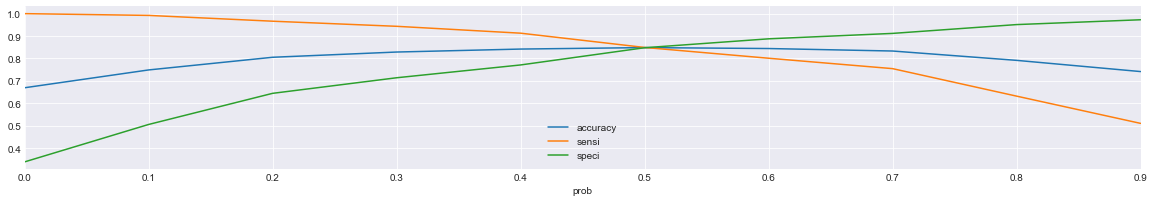

In [271]:
#find optimal cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_finalT1[i] = y_train_pred_finalT1.churn_Prob.map( lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_finalT1.churn, y_train_pred_finalT1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, let'choose 0.52 as the optimum point to make a high enough sensitivity.

In [272]:
# predicting churn with cut-off 0.51
cut_off=0.51

 # predict
pred_probs_T2 = model2_dtree.predict_proba(X_train_pca)[:,1]

y_train_pred_finalT2= pd.DataFrame({'churn':y_tr_im, 'churn_Prob':pred_probs_T2})


y_train_pred_finalT2['predicted'] = y_train_pred_finalT2.churn_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_pred_finalT2.head()


,churn,churn_Prob,predicted
0,0,0.173993,0
1,0,0.294118,0
2,0,0.700000,1
3,0,0.976357,1
4,1,0.476923,0


In [273]:
print("## Model Metrics Report - Train ##")
accuracyTRDT=metrics.accuracy_score(y_train_pred_finalT2.churn, y_train_pred_finalT2.predicted)
print("Accuracy: {:2.4}".format(accuracyTRDT))
RecallTRDT=metrics.recall_score(y_train_pred_finalT2.churn, y_train_pred_finalT2.predicted)
print("Recall : {:2.4}".format(RecallTRDT))
PrecisionTRDT=metrics.precision_score(y_train_pred_finalT2.churn, y_train_pred_finalT2.predicted)
print("Precision : {:2.4}".format(PrecisionTRDT))
rocTRDT=metrics.roc_auc_score(y_train_pred_finalT2.churn, y_train_pred_finalT2.predicted)
print("Roc_auc_score : {:2.4}".format(rocTRDT))

## Model Metrics Report - Train ##
Accuracy: 0.8485
Recall : 0.8454
Precision : 0.8507
Roc_auc_score : 0.8485


In [274]:
#Predict Probability with Optimum Cutoff in Test Data

cut_off=0.52
 # predict
pred_probs_test = df_tree.predict_proba(X_test_pca)[:,1]

y_test_dfT2= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_test})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_dfT2['predicted'] = y_test_dfT2.churn_Prob.map( lambda x: 1 if x > cut_off else 0)
# Let's see the head

y_test_dfT2.head()

,churn,churn_Prob,predicted
4265,0,0.317647,0
29216,0,0.044146,0
974,0,0.565789,1
1602,0,0.976357,1
25454,0,0.902613,1


In [275]:
print("## Model Metrics Report - Test ##")
accuracyTDT=metrics.accuracy_score(y_test_dfT2.churn, y_test_dfT2.predicted)
print("Accuracy: {:2.4}".format(accuracyTDT))
RecallTDT=metrics.recall_score(y_test_dfT2.churn, y_test_dfT2.predicted)
print("Recall : {:2.4}".format(RecallTDT))
PrecisionTDT=metrics.precision_score(y_test_dfT2.churn, y_test_dfT2.predicted)
print("Precision : {:2.4}".format(PrecisionTDT))
rocTDT=metrics.roc_auc_score(y_test_dfT2.churn, y_test_dfT2.predicted)
print("Roc_auc_score : {:2.4}".format(rocTDT))



## Model Metrics Report - Test ##
Accuracy: 0.8096
Recall : 0.6729
Precision : 0.2562
Roc_auc_score : 0.7475


- Decision tree after selecting optimal cut-off also is resulting in a model with


In [276]:
print("###   Model Metrics Decision Tree   ###")
print("TRAIN ==> Accuracy :{0:.2%}".format(accuracyTRDT)+ " ,Recall : {0:.2%}".format(RecallTRDT) +" ,roc auc score  :{0:.2%}".format(rocTRDT))
print("TEST ==>  Accuracy :{0:.2%}".format(accuracyTDT)+ " , Recall : {0:.2%}".format(RecallTDT) +"  ,roc auc score  :{0:.2%}".format(rocTDT))


###   Model Metrics Decision Tree   ###
TRAIN ==> Accuracy :84.85% ,Recall : 84.54% ,roc auc score  :84.85%
TEST ==>  Accuracy :80.96% , Recall : 67.29%  ,roc auc score  :74.75%


## Random Forest

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [199]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [200]:
# fit
model_rfc=rfc.fit(X_train_pca,y_tr_im)

In [201]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [202]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [203]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8222
           1       0.40      0.49      0.44       749

   micro avg       0.90      0.90      0.90      8971
   macro avg       0.68      0.71      0.69      8971
weighted avg       0.91      0.90      0.90      8971



In [204]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7674  548]
 [ 380  369]]


In [205]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test,predictions)))

Accuracy: 0.8965555679411437


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.



In [206]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf1 = RandomForestClassifier()


# fit tree on training data
rf1grid = GridSearchCV(rf1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf1grid.fit(X_train_pca, y_tr_im)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(10, 30, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [207]:
# scores of GridSearch CV
scores = rf1grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.453720,0.127104,0.012601,0.003930,10,{'max_depth': 10},0.876598,0.885990,0.883381,0.881555,...,0.881294,0.003288,4,0.915797,0.917167,0.910807,0.911818,0.913058,0.913729,0.002397
1,1.578165,0.109268,0.018801,0.002786,15,{'max_depth': 15},0.923819,0.914819,0.922906,0.917688,...,0.919436,0.003401,3,0.973617,0.973226,0.976944,0.975248,0.974204,0.974648,0.001335
2,1.650799,0.056086,0.020041,0.005629,20,{'max_depth': 20},0.929559,0.933472,0.935690,0.928124,...,0.930890,0.003160,2,0.988945,0.991064,0.988390,0.989532,0.990380,0.989662,0.000962
3,1.681757,0.055722,0.017321,0.000944,25,{'max_depth': 25},0.932038,0.930994,0.936473,0.930603,...,0.931646,0.002734,1,0.995337,0.995010,0.994195,0.995434,0.995304,0.995056,0.000453


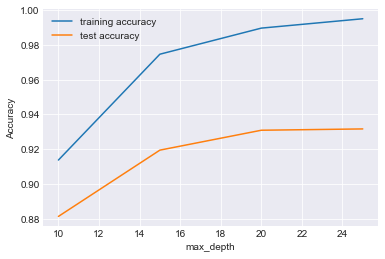

In [208]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores increase
Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.


In [209]:
print("best accuracy : ", rf1grid.best_score_)

print(rf1grid.best_params_)

best accuracy :  0.9316462301069658
{'max_depth': 25}


### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>

In [210]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf2 = RandomForestClassifier(max_depth=25,random_state=10)


# fit tree on training data
rf2grid = GridSearchCV(rf2, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf2grid.fit(X_train_pca, y_tr_im)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 150, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [211]:
# scores of GridSearch CV
scores2 = rf2grid.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.417870,3.173187,0.101605,0.024355,50,{'n_estimators': 50},0.945343,0.947691,0.949909,0.944691,...,0.945526,0.003323,4,0.996967,0.997848,0.997685,0.997391,0.997652,0.997508,0.000308
1,23.443163,10.620052,0.203612,0.081884,75,{'n_estimators': 75},0.945995,0.946908,0.950170,0.946256,...,0.946413,0.002370,3,0.997163,0.998011,0.997782,0.997619,0.997424,0.997600,0.000291
2,22.126831,3.141174,0.211527,0.044047,100,{'n_estimators': 100},0.947430,0.949387,0.949778,0.946908,...,0.947248,0.002510,2,0.997261,0.997913,0.997815,0.997782,0.997326,0.997619,0.000270
3,26.235227,4.466014,0.201811,0.006432,125,{'n_estimators': 125},0.948213,0.949126,0.950822,0.946256,...,0.947822,0.002150,1,0.997098,0.997978,0.997717,0.997750,0.997456,0.997600,0.000301


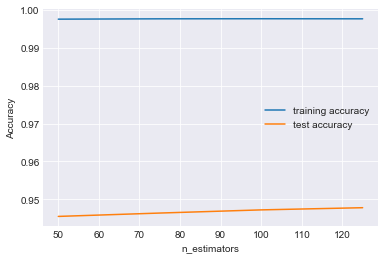

In [212]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [213]:
print("best accuracy", rf2grid.best_score_)

print(rf2grid.best_params_)

best accuracy 0.9478215496999739
{'n_estimators': 125}


### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.


In [214]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf3 = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf3grid = GridSearchCV(rf3, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf3grid.fit(X_train_pca, y_tr_im)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [215]:
# scores of GridSearch CV
scores3 = rf3grid.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.198257,0.312351,0.019641,0.007454,4,{'max_features': 4},0.776546,0.801852,0.794026,0.798461,...,0.795147,0.009974,2,0.799243,0.803059,0.796667,0.803874,0.809255,0.802420,0.004300
1,1.334390,0.040918,0.014801,0.003430,8,{'max_features': 8},0.787503,0.799504,0.805244,0.801461,...,0.799922,0.006645,1,0.803646,0.801852,0.804429,0.802831,0.808309,0.804213,0.002220
2,1.987905,0.103709,0.013521,0.002164,14,{'max_features': 14},0.784764,0.788677,0.805505,0.804983,...,0.794834,0.008686,3,0.797385,0.795884,0.799537,0.803352,0.800254,0.799283,0.002558
3,2.788759,0.123283,0.011601,0.000800,20,{'max_features': 20},0.774980,0.792069,0.797026,0.786068,...,0.788547,0.007627,4,0.795460,0.797776,0.793276,0.786264,0.798428,0.794241,0.004384
4,3.222627,0.192047,0.014921,0.004844,24,{'max_features': 24},0.772502,0.771980,0.793112,0.789199,...,0.783773,0.009504,5,0.793406,0.780785,0.792917,0.791645,0.793765,0.790504,0.004912


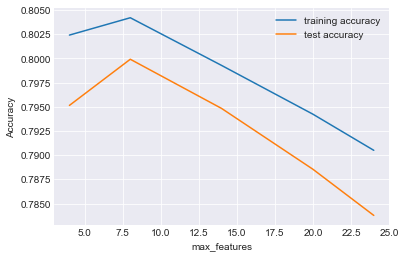

In [216]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores3["param_max_features"], 
         scores3["mean_train_score"], 
         label="training accuracy")
plt.plot(scores3["param_max_features"], 
         scores3["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training and test score increases as we decrease max_features

In [217]:
print("best accuracy", rf3grid.best_score_)
#print(rf.best_estimator_)
print(rf3grid.best_params_)

best accuracy 0.79992173232455
{'max_features': 8}


### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


Let's now check the optimum value for min samples leaf in our case.

In [218]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf4 = RandomForestClassifier()


# fit tree on training data
rf4grid = GridSearchCV(rf4, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf4grid.fit(X_train_pca, y_tr_im)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [219]:
# scores of GridSearch CV
scores4 = rf4grid.cv_results_
pd.DataFrame(scores4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.314880,0.987641,0.027641,0.016805,100,{'min_samples_leaf': 100},0.828072,0.842291,0.849465,0.848552,...,0.840777,0.008092,1,0.853248,0.855433,0.852857,0.856444,0.854194,0.854435,0.001341
1,1.078659,0.078609,0.012801,0.001166,150,{'min_samples_leaf': 150},0.822332,0.834855,0.841117,0.838247,...,0.833994,0.006417,2,0.844280,0.843889,0.844769,0.841280,0.841769,0.843197,0.001403
2,2.125930,0.872889,0.020521,0.008063,200,{'min_samples_leaf': 200},0.811375,0.823506,0.825072,0.831333,...,0.822724,0.006468,3,0.836225,0.833159,0.829148,0.833029,0.831985,0.832709,0.002275
3,1.035859,0.066998,0.012401,0.001200,250,{'min_samples_leaf': 250},0.801852,0.818941,0.823376,0.821289,...,0.816071,0.007647,5,0.829703,0.830355,0.830355,0.829507,0.826996,0.829383,0.001241
4,0.932284,0.060177,0.012921,0.002355,300,{'min_samples_leaf': 300},0.801070,0.817897,0.827681,0.821550,...,0.817219,0.008831,4,0.822724,0.825072,0.821811,0.826213,0.829148,0.824993,0.002609


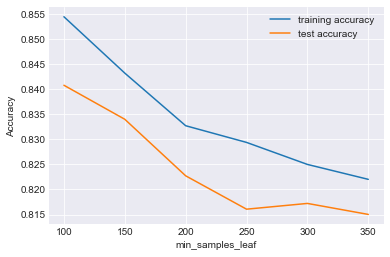

In [220]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores4["param_min_samples_leaf"], 
         scores4["mean_train_score"], 
         label="training accuracy")
plt.plot(scores4["param_min_samples_leaf"], 
         scores4["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

In [221]:
print("best accuracy", rf4grid.best_score_)
#print(rf.best_estimator_)
print(rf4grid.best_params_)

best accuracy 0.8407774589094704
{'min_samples_leaf': 100}


### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.


In [222]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf5 = RandomForestClassifier()


# fit tree on training data
rf5grid = GridSearchCV(rf5, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf5grid.fit(X_train_pca, y_tr_im)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [223]:
# scores of GridSearch CV
scores5 = rf5grid.cv_results_
pd.DataFrame(scores5).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.130991,0.724321,0.021841,0.008031,200,{'min_samples_split': 200},0.840073,0.859118,0.867597,0.859770,...,0.856979,0.009086,1,0.879044,0.878750,0.879272,0.877739,0.879403,0.878842,0.000594
1,1.621369,0.068614,0.026602,0.021248,250,{'min_samples_split': 250},0.836421,0.846204,0.857031,0.852205,...,0.848030,0.006879,2,0.874022,0.867858,0.866488,0.869097,0.871706,0.869834,0.002709
2,1.604292,0.076692,0.018401,0.004587,300,{'min_samples_split': 300},0.829637,0.845030,0.848422,0.855466,...,0.844378,0.008463,3,0.864466,0.859738,0.857944,0.864140,0.863032,0.861864,0.002577
3,1.739299,0.202872,0.018001,0.002530,350,{'min_samples_split': 350},0.826637,0.842552,0.847639,0.846204,...,0.840960,0.007489,4,0.858727,0.855987,0.854455,0.856118,0.858596,0.856777,0.001647
4,1.625693,0.157185,0.017201,0.002227,400,{'min_samples_split': 400},0.822854,0.838638,0.844508,0.840073,...,0.836786,0.007336,5,0.852628,0.853639,0.851259,0.852172,0.854618,0.852863,0.001165


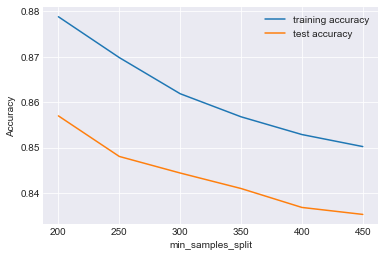

In [224]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores5["param_min_samples_split"], 
         scores5["mean_train_score"], 
         label="training accuracy")
plt.plot(scores5["param_min_samples_split"], 
         scores5["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_split.

In [225]:
print("best accuracy", rf5grid.best_score_)
#print(rf.best_estimator_)
print(rf5grid.best_params_)

best accuracy 0.8569788677276284
{'min_samples_split': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [226]:
print(rf1grid.best_params_ , rf2grid.best_params_ ,rf3grid.best_params_ ,rf4grid.best_params_ ,rf5grid.best_params_ )

{'max_depth': 25} {'n_estimators': 125} {'max_features': 8} {'min_samples_leaf': 100} {'min_samples_split': 200}


In [227]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=rf1grid.best_params_['max_depth'],
                             min_samples_leaf=rf4grid.best_params_['min_samples_leaf'], 
                             min_samples_split=rf5grid.best_params_['min_samples_split'],
                             max_features=rf3grid.best_params_['max_features'],
                             n_estimators=rf2grid.best_params_['n_estimators'])


In [228]:
# fit
train_rfc=rfc.fit(X_train_pca,y_tr_im)

In [229]:
#Predict training set:
rf_pred_new = train_rfc.predict(X_train_pca)
rf_predprob_new = train_rfc.predict_proba(X_train_pca)[:,1]

In [230]:
# predict
predictions = rfc.predict(X_test_pca)

In [231]:
# Test accuracy score
rfc.score(X_test_pca,y_test)

0.8408204213577082

In [232]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
#y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8222
           1       0.31      0.76      0.44       749

   micro avg       0.84      0.84      0.84      8971
   macro avg       0.64      0.80      0.67      8971
weighted avg       0.92      0.84      0.87      8971



In [233]:
# confusion matrix
print(confusion_matrix(y_test,predictions))

[[6976 1246]
 [ 182  567]]


In [277]:
# predicting churn with default cut-off 0.5


cut_off=0.5
 # predict
pred_probs = train_rfc.predict_proba(X_train_pca)[:,1]

y_train_rfc= pd.DataFrame({'churn':y_tr_im, 'churn_Prob':pred_probs})

y_train_rfc['predicted'] = y_train_rfc.churn_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_rfc.head()

,churn,churn_Prob,predicted
0,0,0.254254,0
1,0,0.404152,0
2,0,0.784822,1
3,0,0.776443,1
4,1,0.596923,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.570780  0.999896  0.141664
0.2   0.2  0.704096  0.994678  0.413514
0.3   0.3  0.805896  0.973128  0.638664
0.4   0.4  0.853561  0.930655  0.776468
0.5   0.5  0.869397  0.867832  0.870963
0.6   0.6  0.847065  0.765040  0.929089
0.7   0.7  0.786877  0.609288  0.964466
0.8   0.8  0.695539  0.404174  0.986903
0.9   0.9  0.589225  0.181111  0.997339


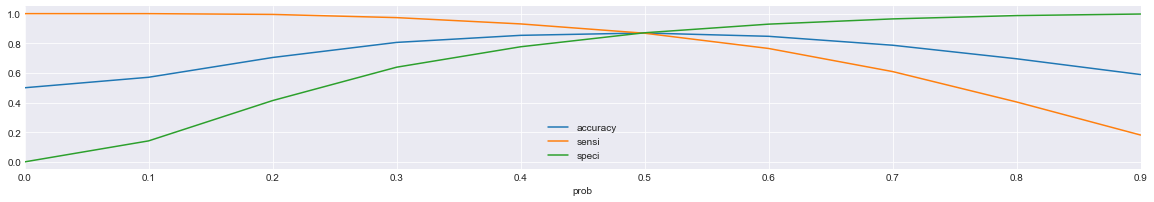

In [278]:
#find optimal cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_rfc[i] = y_train_rfc.churn_Prob.map( lambda x: 1 if x > i else 0)
#print(df.head())

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positivesA
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_rfc.churn, y_train_rfc[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [236]:
#From the curve above, let'choose 0.49 as the optimum point to make a high enough sensitivity.

In [279]:
# predicting churn with cut-off 0.49
cut_off=0.49

 # predict
pred_probs_rfc1 = train_rfc.predict_proba(X_train_pca)[:,1]

y_train_pred_rfc1= pd.DataFrame({'churn':y_tr_im, 'churn_Prob':pred_probs_rfc1})

y_train_pred_rfc1['predicted'] = y_train_pred_rfc1.churn_Prob.map( lambda x: 1 if x > cut_off else 0)

y_train_pred_rfc1.head()

,churn,churn_Prob,predicted
0,0,0.254254,0
1,0,0.404152,0
2,0,0.784822,1
3,0,0.776443,1
4,1,0.596923,1


In [280]:
print("## TRAIN DATA METRICS ##")
accuracyRFTR=metrics.accuracy_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Accuracy: {:2.4}".format(accuracyRFTR))
RecallRFTR=metrics.recall_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Recall : {:2.4}".format(RecallRFTR))
PrecisionRFTR=metrics.precision_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Precision : {:2.4}".format(PrecisionRFTR))
RocRFTR=metrics.roc_auc_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Roc_auc_score : {:2.4}".format(RocRFTR))

## TRAIN DATA METRICS ##
Accuracy: 0.8693
Recall : 0.8757
Precision : 0.8647
Roc_auc_score : 0.8693


In [282]:
#Lets see how it performs on test data.

cut_off=0.49
 # predict
pred_probs_rfc_tst = rfc.predict_proba(X_test_pca)[:,1]

y_test_rfc= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_rfc_tst})
# Creating new column 'predicted' with 1 if Churn_Prob>0.48 else 0
y_test_rfc['predicted'] = y_test_rfc.churn_Prob.map( lambda x: 1 if x > cut_off else 0)
# Let's see the head
y_test_rfc.head()

,churn,churn_Prob,predicted
4265,0,0.569430,1
29216,0,0.131071,0
974,0,0.816320,1
1602,0,0.568476,1
25454,0,0.311724,0


In [283]:
print("## TEST DATA METRICS ##")

AccuracyRFT=metrics.accuracy_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Accuracy: {:2.4}".format(AccuracyRFT))
RecallRFT =metrics.recall_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Recall : {:2.4}".format(RecallRFT))
PrecisionRFT =metrics.precision_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Precision : {:2.4}".format(PrecisionRFT))
RocRFT=metrics.roc_auc_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Roc_auc_score : {:2.4}".format(RocRFT))

## TEST DATA METRICS ##
Accuracy: 0.8331
Recall : 0.7677
Precision : 0.303
Roc_auc_score : 0.8034


- Random Forest after selecting optimal cut-off also is resulting in a model with


In [284]:
print("###   Model Metrics Random Forest   ###")
print("TRAIN ==> Accuracy :{0:.2%}".format(accuracyRFTR)+ " ,Recall : {0:.2%}".format(RecallRFTR) +" ,roc auc score  :{0:.2%}".format(RocRFTR))
print("TEST ==>  Accuracy :{0:.2%}".format(AccuracyRFT)+ " , Recall : {0:.2%}".format(RecallRFT) +"  ,roc auc score  :{0:.2%}".format(RocRFT))


###   Model Metrics Random Forest   ###
TRAIN ==> Accuracy :86.93% ,Recall : 87.57% ,roc auc score  :86.93%
TEST ==>  Accuracy :83.31% , Recall : 76.77%  ,roc auc score  :80.34%


#### DIFFERENT MODEL EVALUATION METRICS

#####   Model Metrics Logistic Regression   ###

PROBABILITY CUT OFF -- 0.52

TRAIN ==> Accuracy :83.84% ,Sensitivity/Recall : 84.87%  ,Specificity :82.80%  ,roc auc score  :90.55%
<br>TEST ==>  Accuracy :82.10% ,Sensitivity/Recall : 81.98%  ,Specificity :82.11%  ,roc auc score  :88.05%

#####   Model Metrics Decision Tree   ###

PROBABILITY CUT OFF -- 0.52

TRAIN ==> Accuracy :84.85% ,Recall : 84.54% ,roc auc score  :84.85%
<br>TEST ==>  Accuracy :80.96% , Recall : 67.29%  ,roc auc score  :74.75%

#####   Model Metrics Random Forest   ###

PROBABILITY CUT OFF -- 0.49

TRAIN ==> Accuracy :86.93% ,Recall : 87.57% ,roc auc score  :86.93%
<br>TEST ==>  Accuracy :83.31% , Recall : 76.77%  ,roc auc score  :80.34%


Overall, the Random Forest model with probability cut-off = 0.49, performs best. It achieved the best recall accuracy of 87.57% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. 

#### Identifying Important features 

In [285]:
importances = train_rfc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'Values','ColNames'})
RF_feature_importance.head()

,Values,ColNames
0,0.107080,loc_og_t2m_mou_8
1,0.104626,onnet_mou_8
2,0.097596,offnet_mou_6
3,0.095078,arpu_7
4,0.073983,loc_og_t2f_mou_6


<Figure size 1440x216 with 0 Axes>

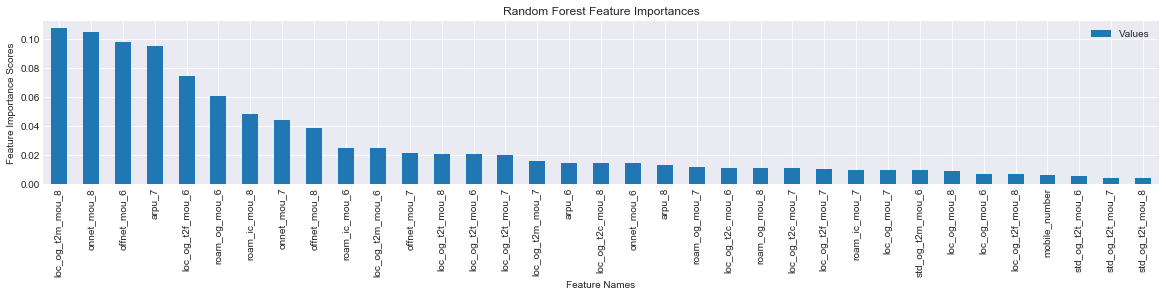

In [286]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
#plt.figure(figsize=(20,3))
RF_feature_importance[0:50].plot(x='ColNames', y='Values' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Scores')
plt.xlabel('Feature Names')

plt.show()

In [287]:
RF_feature_importance.shape

(35, 2)

In [288]:
imp_features = RF_feature_importance.head(20)
imp_features

,Values,ColNames
0,0.107080,loc_og_t2m_mou_8
1,0.104626,onnet_mou_8
2,0.097596,offnet_mou_6
3,0.095078,arpu_7
4,0.073983,loc_og_t2f_mou_6
5,0.060764,roam_og_mou_6
6,0.048209,roam_ic_mou_8
7,0.044233,onnet_mou_7
8,0.038331,offnet_mou_8
9,0.024965,roam_ic_mou_6


#### Rebuild Random Forest Model using Important features

In [289]:
X_imp = Telecom_Gud[list(imp_features.ColNames.unique())]
Y_imp = Telecom_Gud['churn']

In [290]:
X_imp_std = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp_std,Y_imp, train_size=0.8,test_size=0.2,random_state=111)

In [291]:
RF_imp=RandomForestClassifier(n_estimators=125, criterion= 'entropy', max_depth=25,random_state=111, class_weight='balanced')
RF_imp.fit(X_imp_train, y_imp_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=25, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=125, n_jobs=None, oob_score=False,
            random_state=111, verbose=0, warm_start=False)

In [292]:
RF_imp_pred_test = RF_imp.predict(X_imp_test)
print(classification_report(y_imp_test, RF_imp_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5436
           1       0.68      0.39      0.49       545

   micro avg       0.93      0.93      0.93      5981
   macro avg       0.81      0.68      0.73      5981
weighted avg       0.92      0.93      0.92      5981



auc_roc_score is : 0.8974


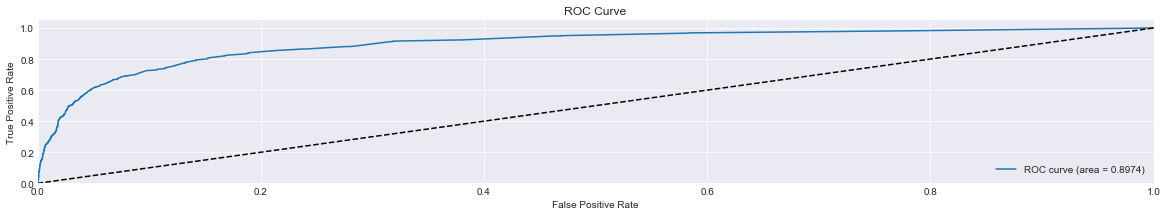

In [295]:
# Perforamance of the model
fpr, tpr, _ = metrics.roc_curve(y_imp_test, RF_imp.predict_proba(X_imp_test)[:,1])
AUC  = metrics.auc(fpr, tpr)
print ('auc_roc_score is : %0.4f' %  AUC)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We train our random forest algorithm on the top 20 features that we selected above and then we evaluated the performance of our algorithm on the training and testing sets. We can see the AUC & F1-score are pretty similar on training & test datasets which means our model is not overfitting.

In [294]:
print("Important Features Are :")
imp_features

Important Features Are :


,Values,ColNames
0,0.107080,loc_og_t2m_mou_8
1,0.104626,onnet_mou_8
2,0.097596,offnet_mou_6
3,0.095078,arpu_7
4,0.073983,loc_og_t2f_mou_6
5,0.060764,roam_og_mou_6
6,0.048209,roam_ic_mou_8
7,0.044233,onnet_mou_7
8,0.038331,offnet_mou_8
9,0.024965,roam_ic_mou_6


##### Recommendations 

 The telecom company should pay close attention to  MoU, ARPU  month over month. If feasible, the company should track these  week over week.<br>
=>The other key factor is if the average revenue shows a dip in the action phase is sign of churn.<br>
=>All kind of calls within the same operator network(onnet) in the action phase is a sign of churn.<br>
=>All kind of calls outside the operator T network(offnet)in the good phase is a sign of churn.<br>

